In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
import xgboost

c:\users\jhkim6\pycharmprojects\gc\venv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [4]:
from joblib import dump, load

In [5]:
import json

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})
import sklearn

# 마이너스 부호 깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# row 출력제한 해제
pd.set_option('display.max_row', 500)

# column 출력제한 해제
pd.set_option('display.max_columns', 100)

In [8]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
from impyute.imputation.cs import mice, fast_knn

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from itertools import product
from scipy.stats import gaussian_kde
from scipy import stats

In [12]:
# import keras
# from keras import layers
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping

In [13]:
# import torch 
# from torch import nn,optim
# from torch.utils.data import DataLoader, Dataset
# import torch.nn.functional as F

# Data Load

In [14]:
with open('../input/DM_건강검진결과_토탈_피봇241014.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw = pd.DataFrame(js)

In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Columns: 136 entries, 검진년도 to 심장주위지방CT
dtypes: int64(4), object(132)
memory usage: 1.2+ GB


In [16]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Cortisol(스트레스호르몬)', '성장관련인자(IGF1)', 'Testosterone(테스토스테론)',
       '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)', 'NK세포활성도검사', 'P(인)',
       '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT'],
      dtype='object', length=136)

## config 설정

In [17]:
# scaling_bool = True
scaling_bool = False

In [18]:
sample_len = 2000

In [19]:
XGB_bool = True
pyTorch_bool = False

In [20]:
# 높을수록 False, 낮을수록 True
# target_cols_direction = [False,]
target_cols_direction = ['center',]

In [21]:
target_cols_ratio = [2,]

In [22]:
target_cols_kde = ['글로블린_kde',]

In [23]:
csv_path = './output/면역기능_항체생성.csv'

In [24]:
model_path_man = './model/0202_man.pkl'

In [25]:
model_path_woman = './model/0202_woman.pkl'

## 연령대 제한

In [26]:
len(raw)

1227553

In [27]:
raw = raw[(raw['검진당시나이'] >= 20) & (raw['검진당시나이'] < 70)]
raw.reset_index(drop=True, inplace=True)

In [28]:
len(raw)

1213899

In [29]:
# df = raw.drop(['CU_INF_CONT', 'BRDT', 'ETL_REG_DTM', '검진완료일자',                           
#                # text
#                '심전도', '아질산염 (Nitrite)',
#                '갑상선초음파 (Thyroid Sono)', '위내시경 (Endo)', '상복부초음파 (Abdominal Sono)', '대장내시경',
#                '흉부X-선 (Chest PA)', '골밀도검사(BMD)', '경동맥초음파 (Carotid Sono)', '요추 CT', '뇌 CT', '동맥경화검사', '경추 CT',
#                '심장초음파 (Echocardio Sono)', '뇌MRI', '뇌MRA', '골밀도검사(허리)', '골밀도검사 (T-Score)', 
#                '위암혈액검사(Pepsinogen I)', 'Gastrin(가스트린)', 'Helicobactor pylori IgG(혈액)', 
#                'Helicobactor Pylori IgM(혈액)', '심장칼슘CT', '심장주위지방CT',
#               ], axis=1)

In [30]:
cols = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
#                '체중', '신장', '허리둘레', # 기본신체정보
                '글로블린'
               ]

df = raw[cols]

In [31]:
df.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린
0,2010,7282,2520,1,42,None
1,2010,7490,3638,1,39,2.4
2,2010,7915,3997,1,36,3
3,2010,8056,4745,1,42,2.5
4,2010,8457,3929,1,38,3.1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   검진년도       1213899 non-null  object
 1   UID        1213899 non-null  int64 
 2   CU_REC_ID  1213899 non-null  int64 
 3   SEX        1213899 non-null  int64 
 4   검진당시나이     1213899 non-null  int64 
 5   글로블린       909932 non-null   object
dtypes: int64(4), object(2)
memory usage: 55.6+ MB


In [33]:
df.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '글로블린'], dtype='object')

In [34]:
# df.columns = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '체중', '신장', '허리둘레', '체질량지수', 
#              '갑상선자극호르몬', 'Free T4'
#              ]

In [35]:
df.describe()

,UID,CU_REC_ID,SEX,검진당시나이
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06
mean,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01
std,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00
min,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01
25%,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01
50%,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01
75%,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01
max,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01


## 그룹별 결측값을 대체, 종합검진과 공단검진 차이(누락)에 대한 대체

In [36]:
df.isnull().sum()

검진년도              0
UID               0
CU_REC_ID         0
SEX               0
검진당시나이            0
글로블린         303967
dtype: int64

In [37]:
df_group = df.groupby(['UID', '검진년도'])

In [38]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [39]:
temp

['글로블린']

In [40]:
import time
start = time.time()
for col in temp:
    print('column :', col)
    df[col] = df_group[col].transform(lambda x: x.interpolate('nearest').ffill().bfill())
end = time.time()
print(f"{end - start:.5f} sec")

column : 글로블린
620.04467 sec


In [41]:
df.isnull().sum()

검진년도              0
UID               0
CU_REC_ID         0
SEX               0
검진당시나이            0
글로블린         250035
dtype: int64

## nemeric으로 치환 못하는 수치들 결측치로 변환

In [42]:
numeric_col = df.columns

In [43]:
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1213899 non-null  int64  
 1   UID        1213899 non-null  int64  
 2   CU_REC_ID  1213899 non-null  int64  
 3   SEX        1213899 non-null  int64  
 4   검진당시나이     1213899 non-null  int64  
 5   글로블린       962998 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 55.6 MB


In [45]:
df.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,962998.000000
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,2.653711
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,1.004647
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,-62.000000
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,2.400000
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,2.600000
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,2.900000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,546.000000


In [46]:
df_result = df.copy()

# 이상치 제거

In [47]:
len(df_result)

1213899

In [48]:
# IQR 기준 이상치 확인하는 함수
def findOutliers_column(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 2.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print('minimum :', minimum, 'maximum :', maximum)
    y = x[(x[column] > maximum) | (x[column] < minimum)]
#     y = x[(x[column] <= maximum) & (x[column] >= minimum)]
#     print(y.info())
#     print(y.index)
    return y, minimum, maximum

def findOutliers_column_out(x, column, minimum, maximum):
    y = x[(x[column] > maximum) | (x[column] < minimum)]
    return y
    
# IQR 기준 이상치 확인하는 함수
def findOutliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    threshold = 2.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print(minimum)
    y = x[(x > maximum) | (x < minimum)]
#     return len(y)
    return y

## 이상치 컬럼 min, max 확인 및 drop

In [49]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [50]:
# IQR 기준 이상치 개수 확인
# target_cols = [
#                '검진당시나이', 
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)', #기본신체정보
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                ]
target_cols = temp

minimums = []
maximums = []

for col in target_cols:
    target_outlier, temp_min, temp_max = findOutliers_column(df_result, col)
    print(col, ':', len(df_result[col]),"/ IQR outliers: ", len(target_outlier), '/ ratio :', len(target_outlier)/len(df_result[col]))
    print()
    minimums.append(temp_min)
    maximums.append(temp_max)

for idx, col in enumerate(target_cols):    
    target_outlier = findOutliers_column_out(df_result, col, minimums[idx], maximums[idx])
    df_result = df_result.drop(target_outlier.index)
    df_result.reset_index(drop=True, inplace=True)

minimum : 1.15 maximum : 4.15
글로블린 : 1213899 / IQR outliers:  2131 / ratio : 0.0017555002516683842



In [51]:
target_cols

['글로블린']

In [52]:
minimums

[1.15]

In [53]:
maximums

[4.15]

In [54]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211768 entries, 0 to 1211767
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1211768 non-null  int64  
 1   UID        1211768 non-null  int64  
 2   CU_REC_ID  1211768 non-null  int64  
 3   SEX        1211768 non-null  int64  
 4   검진당시나이     1211768 non-null  int64  
 5   글로블린       960867 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 55.5 MB


In [55]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린
0,2010,7282,2520,1,42,NaN
1,2010,7490,3638,1,39,2.4
2,2010,7915,3997,1,36,3.0
3,2010,8056,4745,1,42,2.5
4,2010,8457,3929,1,38,3.1


In [56]:
len(df_result)

1211768

In [57]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211768 entries, 0 to 1211767
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1211768 non-null  int64  
 1   UID        1211768 non-null  int64  
 2   CU_REC_ID  1211768 non-null  int64  
 3   SEX        1211768 non-null  int64  
 4   검진당시나이     1211768 non-null  int64  
 5   글로블린       960867 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 55.5 MB


In [58]:
df_result.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린
count,1.211768e+06,1.211768e+06,1.211768e+06,1.211768e+06,1.211768e+06,960867.000000
mean,2.021883e+03,5.089054e+05,1.492244e+06,1.369402e+00,4.074556e+01,2.643014
std,1.696249e+00,3.653224e+05,7.933037e+05,4.826430e-01,8.917290e+00,0.363211
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,1.160000
25%,2.021000e+03,2.213420e+05,6.805658e+05,1.000000e+00,3.400000e+01,2.400000
50%,2.022000e+03,3.807395e+05,1.412790e+06,1.000000e+00,4.000000e+01,2.600000
75%,2.023000e+03,8.364625e+05,2.174031e+06,2.000000e+00,4.800000e+01,2.900000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,4.150000


# 스크리닝

## 글로블린 스크리닝

In [59]:
screening = 3.5

In [60]:
scr_col = '글로블린'

In [61]:
df_result[df_result[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린
71,2010,144568,2565,1,28,4.1
398,2010,361301,2274,1,37,3.8
471,2010,481525,3671,1,34,3.8
481,2010,494402,3994,1,42,3.6
484,2010,495706,3702,1,46,3.8


In [62]:
len(df_result[df_result[scr_col] > screening])

11154

In [63]:
df_result.loc[df_result[scr_col] > screening, scr_col] = screening

In [64]:
df_result[df_result[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린


In [65]:
len(df_result[df_result[scr_col] > screening])

0

# target (건강지수) 계산

In [66]:
len(df_result)

1211768

## Linear Regression coefficient 계산

In [67]:
def LR_coef(df):
    df_ = df.copy()
#     df_.reset_index(drop=True, inplace=True)
    df_.fillna(df_.mean().round(2), inplace=True)
    print(len(df_))
    
    df_temp = pd.DataFrame()

    for age in range(df_['검진당시나이'].min(), df_['검진당시나이'].max()):
        temp_ = df_[df_['검진당시나이'] == age].sample(n = sample_len, replace=True)
        df_temp = pd.concat([df_temp, temp_])
        
    X_train, X_test, y_train, y_test = train_test_split(df_temp[target_cols], df_temp['검진당시나이'], test_size=0.25, random_state=87)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('r2_score :',r2_score(y_test, y_pred))
    print('MAE :',mean_absolute_error(y_test, y_pred))
    print('model.coef_ :',model.coef_)
    print('model.intercept_ :',model.intercept_)
    
    df_['target_org'] = (model.coef_[0] * df_[target_cols[0]]) 
    + (model.coef_[1] * df_[target_cols[1]]) 
    + (model.coef_[2] * df_[target_cols[2]]) 
    + (model.coef_[3] * df_[target_cols[3]]) 
    + (model.coef_[4] * df_[target_cols[4]]) 
    + (model.coef_[5] * df_[target_cols[5]]) 
    + (model.coef_[6] * df_[target_cols[6]])
    + (model.coef_[7] * df_[target_cols[7]])
    
    df_['target'] = ((df_['target_org'] - df_['target_org'].min()) / (df_['target_org'].max() - df_['target_org'].min()))
        
    print('min :', df_['target_org'].min())
    print('max :', df_['target_org'].max())
    
    df_['target'] = (df_['target'] * 100) + 50
    
    df['target'] = df_['target']
    
    return df

In [68]:
# target_cols

In [69]:
# df_man = df_result[df_result['SEX'] == 1]
# df_man = LR_coef(df_man)

In [70]:
# df_man[df_man['target'].isna()]

In [71]:
# df_woman = df_result[df_result['SEX'] == 2]
# df_woman = LR_coef(df_woman)

In [72]:
# df_target = pd.concat([df_man, df_woman])

In [73]:
# len(df_target)

In [74]:
# df_target.dropna(subset=target_cols, how='all', inplace=True)
# df_target.reset_index(drop=True, inplace=True)

In [75]:
# len(df_target)

In [76]:
# df_target[df_target['target'].isna()]

In [77]:
# df_target.info()

In [78]:
# df_target.head()

In [79]:
# df_target['target'] = np.round(df_target['target'])
# df_target['target'] = df_target['target'].astype(int)

In [80]:
# len(df_target)

In [81]:
# df_target.describe()

In [82]:
# df_target[df_target['target'] == 50]

In [83]:
# df_target[df_target['target'] == 150]

## target (건강지수) 컬럼들간 mean으로 계산

In [84]:
# df_target = pd.DataFrame()

# for age in range(int(df_result['검진당시나이'].min()), int(df_result['검진당시나이'].max()) + 1):
# # for age in range(int(df_result['검진당시나이'].min()), 21):
    
#     df_cols = pd.DataFrame()
#     for col in target_cols:
#         df_temp = df_result[df_result['검진당시나이'] == age].copy()
#         df_temp['target_' + col] = ((df_temp[col] - df_temp[col].min()) / (df_temp[col].max() - df_temp[col].min()))
# #         print(age, df_temp[col].min(), df_temp[col].max(), df_temp[col].mean())
#         temp = df_temp['target_' + col].copy()
#         df_cols = pd.concat([df_cols, temp], axis=1)
    
#     df_cols['target'] = np.round(df_cols.mean(axis='columns') * 100) + 50
# #     df_target = pd.concat([df_target,pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols], axis=1)])
    
#     df_age = pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols['target']], axis=1)        
    
#     df_target = pd.concat([df_target, df_age])
    
# df_target.reset_index(drop=True, inplace=True)
# df_target.dropna(subset=['target'], inplace=True)
# df_target['target'] = df_target['target'].astype(int)

In [85]:
# len(df_target)

In [86]:
# df_target.head()

In [87]:
# df_target.info()

## gaussian_kde

<AxesSubplot:>

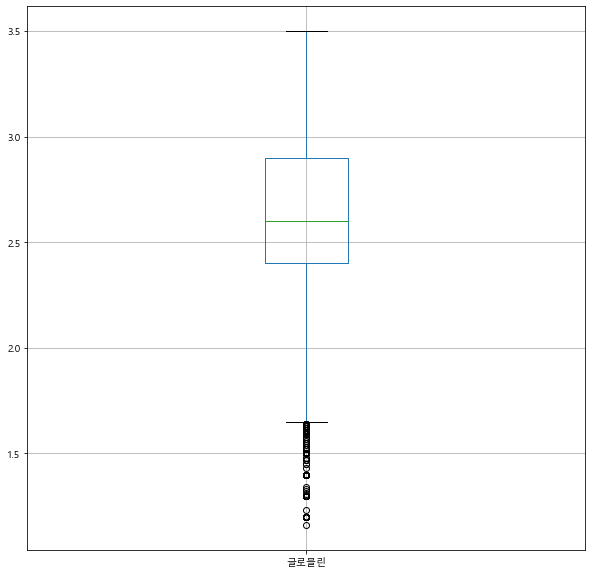

In [88]:
plt.rcParams["figure.figsize"] = (10, 10)
df_result.boxplot(column=target_cols)

In [89]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린
0,2010,7282,2520,1,42,NaN
1,2010,7490,3638,1,39,2.4
2,2010,7915,3997,1,36,3.0
3,2010,8056,4745,1,42,2.5
4,2010,8457,3929,1,38,3.1


In [90]:
target_cols

['글로블린']

In [91]:
len(target_cols)

1

In [92]:
target_cols_direction

['center']

In [93]:
def kde_col(df, cols):
    
    threshold = 100
    max_threshold = 150
    
    df_target = pd.DataFrame() # return DF
    
    # 연령대별로 sample_len개 샘플링
    tmp_data = df.groupby(['SEX', '검진당시나이']).apply(
        lambda x: x.sample(sample_len, replace=True, random_state=42))

    tmp_data.reset_index(drop=True, inplace=True)
    
    # 성연령별 모델 생성
    for sex, age in product([1, 2], range(df['검진당시나이'].min(), df['검진당시나이'].max() + 1)):    
        tmp_data2 = tmp_data[tmp_data['SEX'] == sex]
        tmp_data3 = tmp_data2[tmp_data2['검진당시나이'] == age]
        
        df_temp = df[df['SEX'] == sex]
        df_temp = df_temp[df_temp['검진당시나이'] == age]
        df_temp.reset_index(drop=True, inplace=True)
            
        df_age = pd.DataFrame()
        
        for index, col in enumerate(cols):
        
            input_data = tmp_data3[col].copy()
            
            # 결측치가 많을 때 평균을 넣게 되면 평균쪽으로 쏠림
#             try:
#                 input_data.fillna(input_data.mean().round(0), inplace=True)
#             except:                
#                 input_data.fillna(tmp_data2[col].mean().round(0), inplace=True)

            input_data.dropna(inplace = True)
                
            input_data = input_data.sort_values()
            
            if len(input_data.value_counts()) > 1:
                # kde 모델
                kde = gaussian_kde(input_data)
                result = kde(input_data)
                max_value = result.max()            

                df_col = df_temp[col].copy()
                df_col.fillna(df_col.mean().round(0), inplace=True)

                # 방향성이 있을 경우
                max_idx = result.argmax()  # 최대값의 인덱스
                std_value = input_data.iloc[max_idx] # 인덱스 최대값의 밸류값

                '''
                display print
                '''
#                 print('')
#                 print('@@ col :',col)
#                 plt.rcParams["figure.figsize"] = (5, 5)
#                 print('sex :',sex)
#                 print('age :',age)
#                 fig = plt.figure()
#                 ax = fig.add_subplot(111)
#                 x_eval = np.linspace(50, 140, num=200)
#                 ax.plot(input_data, result, 'k-')                
#                 plt.show()
#                 print('max_value: ',max_value)
#                 print('std_value: ',std_value)

                arr = []

                temp = pd.DataFrame(kde(df_col), columns=['kde'])

                if target_cols_direction[index]:
                    # center right
                    temp['trigger'] = (df_col >= std_value)
                elif target_cols_direction[index] == False:
                    # center left
                    temp['trigger'] = (df_col < std_value)

                if target_cols_direction[index] != 'center':
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * threshold if trigger else (1 + (1 - (temp['kde'].iloc[idx] / max_value))) * threshold
                                      for idx, trigger in temp['trigger'].iteritems()]
                else:                
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * (threshold * 1.5) for idx, value in temp['kde'].iteritems()]

    #             temp['gap'] = abs(temp['output'] - threshold)            
    #             a = 11
    #             temp['adjusted_gap'] = [np.log(temp['gap'].iloc[idx]) * a if gap> np.e else gap for idx, gap in temp['gap'].iteritems()]            
    #             temp[col + '_kde'] = [threshold - temp['adjusted_gap'].iloc[idx] if trigger else threshold + temp['adjusted_gap'].iloc[idx] for idx, trigger in temp['trigger'].iteritems()]

                temp[col + '_kde'] = temp['output']
                temp[col + '_kde'] = temp[col + '_kde'].round(2)
            else:
                temp[col + '_kde'] = threshold
            
            df_age = pd.concat([df_age, temp[col + '_kde']], axis=1)

        df_temp = pd.concat([df_temp, df_age], axis=1)
        df_target = pd.concat([df_target, df_temp])
        df_target.reset_index(drop=True, inplace=True)
    
    # Null 이면 100
    for col in target_cols:
        for idx in df_target[col][df_target[col].isnull()].index:        
            df_target.loc[idx, col + '_kde'] = threshold
            
    df_target['kde_mean'] = df_target.iloc[:, (5+len(cols)):(5+len(cols)+len(cols))].mean('columns').round(2)
    
#     for col in target_cols:
#         df_target.drop([col + '_kde'], axis = 1, inplace = True)
    
    df_target.sort_values(by='CU_REC_ID', inplace=True)
    
    return df_target

In [572]:
import time
start = time.time()
df_target = kde_col(df_result, target_cols)
end = time.time()
print(f"{end - start:.5f} sec")

233.72707 sec


## 검진 항목 별 가중치 

In [573]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean
316616,2010,609272,143,1,40,2.6,200.00,200.00
633934,2010,585711,154,1,52,NaN,100.00,100.00
532975,2010,593983,156,1,48,NaN,100.00,100.00
289062,2010,612330,185,1,39,2.8,172.33,172.33
25635,2010,645901,212,1,28,3.1,76.77,76.77


In [574]:
target_cols_kde

['글로블린_kde']

In [575]:
target_cols_ratio

[2]

In [576]:
sum(target_cols_ratio)

2

In [577]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1211768 entries, 316616 to 176582
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1211768 non-null  int64  
 1   UID        1211768 non-null  int64  
 2   CU_REC_ID  1211768 non-null  int64  
 3   SEX        1211768 non-null  int64  
 4   검진당시나이     1211768 non-null  int64  
 5   글로블린       960867 non-null   float64
 6   글로블린_kde   1211768 non-null  float64
 7   kde_mean   1211768 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 83.2 MB


In [578]:
df_target['kde_mean'] = (
      (target_cols_ratio[0] * df_target[target_cols_kde[0]])     
) / sum(target_cols_ratio)

In [579]:
df_target['kde_mean'] = np.round(df_target['kde_mean'], 2)

In [580]:
df_target['kde_mean'].min()

0.0

In [581]:
df_target['kde_mean'].max()

203.9

In [582]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean
count,1.211768e+06,1.211768e+06,1.211768e+06,1.211768e+06,1.211768e+06,960867.000000,1.211768e+06,1.211768e+06
mean,2.021883e+03,5.089054e+05,1.492244e+06,1.369402e+00,4.074556e+01,2.639943,1.344939e+02,1.344939e+02
std,1.696249e+00,3.653224e+05,7.933037e+05,4.826430e-01,8.917290e+00,0.354298,5.008922e+01,5.008922e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,1.160000,0.000000e+00,0.000000e+00
25%,2.021000e+03,2.213420e+05,6.805658e+05,1.000000e+00,3.400000e+01,2.400000,1.000000e+02,1.000000e+02
50%,2.022000e+03,3.807395e+05,1.412790e+06,1.000000e+00,4.000000e+01,2.600000,1.390700e+02,1.390700e+02
75%,2.023000e+03,8.364625e+05,2.174031e+06,2.000000e+00,4.800000e+01,2.900000,1.820600e+02,1.820600e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,3.500000,2.039000e+02,2.039000e+02


<AxesSubplot:>

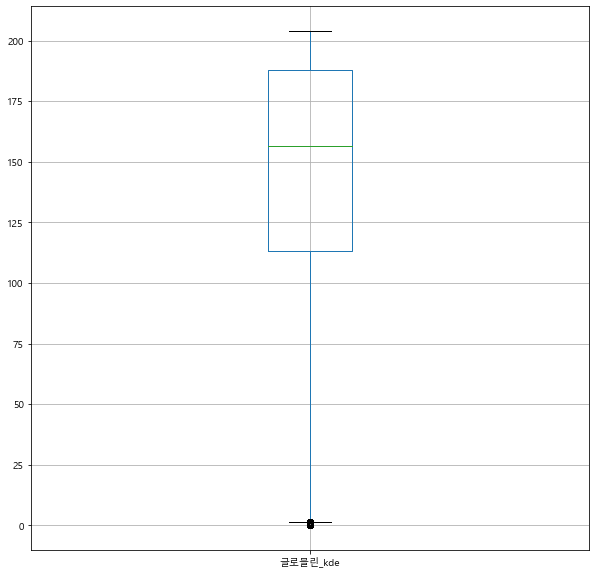

In [583]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['글로블린_kde',
                          ])

## target Scaling

In [584]:
# df_target['target'] = ((df_target['kde_mean'] - df_target['kde_mean'].min()) / (df_target['kde_mean'].max() - df_target['kde_mean'].min()))
df_target['target'] = ((df_target['kde_mean'] - 0) / (200 - 0))

In [585]:
df_target['target'] = (df_target['target'] * 100) + 50

In [586]:
df_target['target'] = df_target['target'].round(0)

In [587]:
df_target['target'].value_counts().reset_index().sort_values('index')

,index,target
100,50.0,552
97,51.0,907
98,52.0,879
94,53.0,1099
96,54.0,958
99,55.0,843
95,56.0,990
92,57.0,1546
93,58.0,1166
91,59.0,1898


In [588]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target
count,1.211768e+06,1.211768e+06,1.211768e+06,1.211768e+06,1.211768e+06,960867.000000,1.211768e+06,1.211768e+06,1.211768e+06
mean,2.021883e+03,5.089054e+05,1.492244e+06,1.369402e+00,4.074556e+01,2.639943,1.344939e+02,1.344939e+02,1.172439e+02
std,1.696249e+00,3.653224e+05,7.933037e+05,4.826430e-01,8.917290e+00,0.354298,5.008922e+01,5.008922e+01,2.504344e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,1.160000,0.000000e+00,0.000000e+00,5.000000e+01
25%,2.021000e+03,2.213420e+05,6.805658e+05,1.000000e+00,3.400000e+01,2.400000,1.000000e+02,1.000000e+02,1.000000e+02
50%,2.022000e+03,3.807395e+05,1.412790e+06,1.000000e+00,4.000000e+01,2.600000,1.390700e+02,1.390700e+02,1.200000e+02
75%,2.023000e+03,8.364625e+05,2.174031e+06,2.000000e+00,4.800000e+01,2.900000,1.820600e+02,1.820600e+02,1.410000e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,3.500000,2.039000e+02,2.039000e+02,1.520000e+02


<AxesSubplot:>

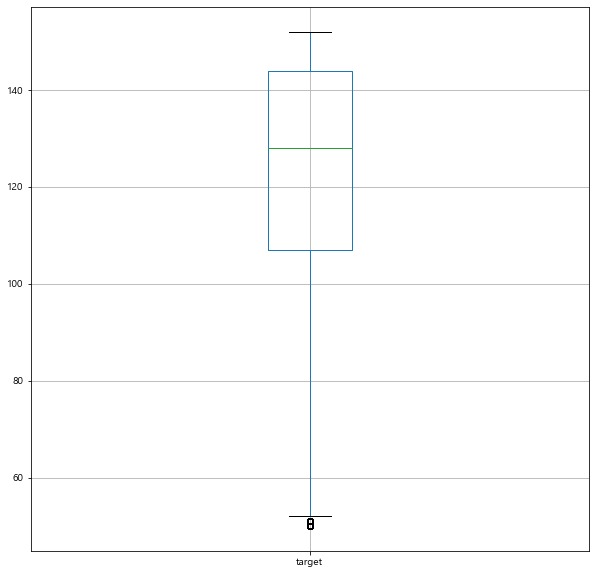

In [589]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

## target 계산 결과

<AxesSubplot:xlabel='검진당시나이'>

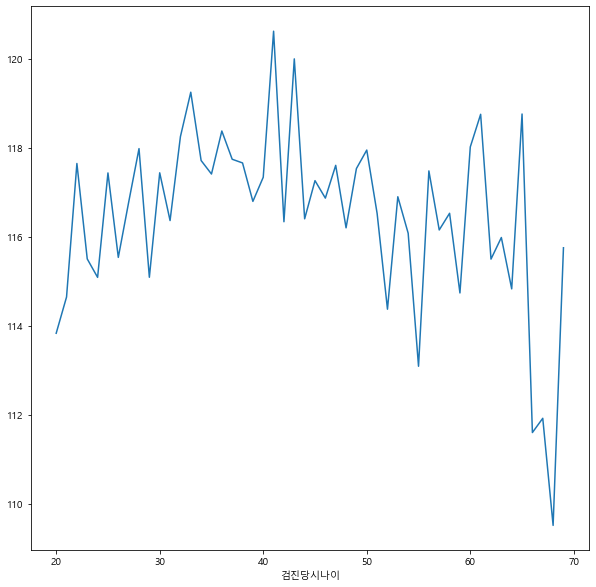

In [590]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').mean()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

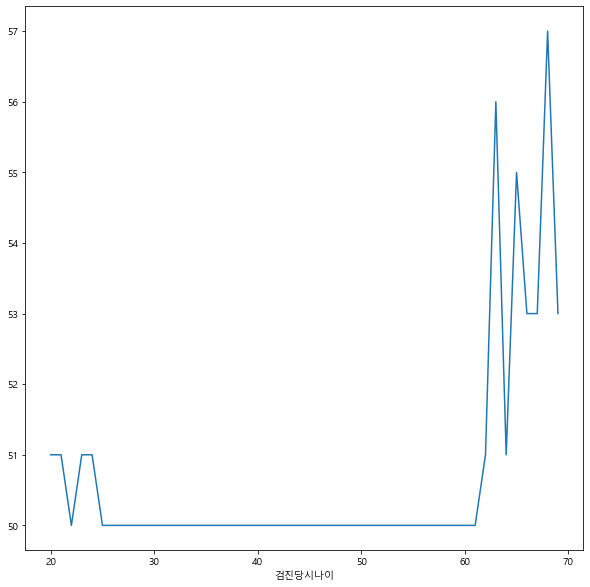

In [591]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').min()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

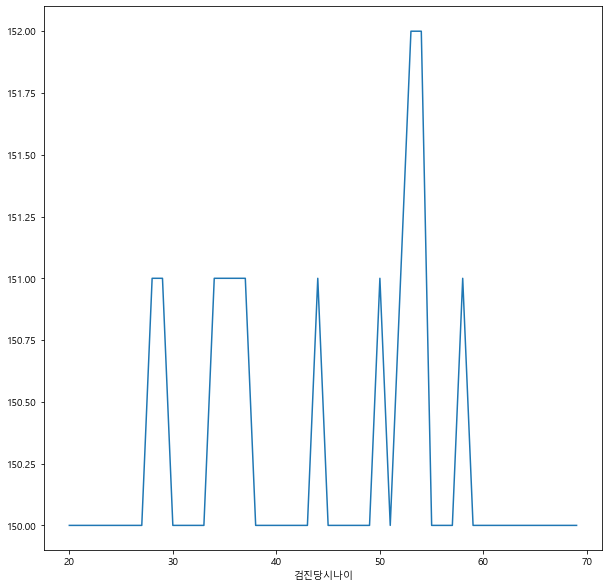

In [592]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').max()['target'].plot()

In [593]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target
316616,2010,609272,143,1,40,2.6,200.00,200.00,150.0
633934,2010,585711,154,1,52,NaN,100.00,100.00,100.0
532975,2010,593983,156,1,48,NaN,100.00,100.00,100.0
289062,2010,612330,185,1,39,2.8,172.33,172.33,136.0
25635,2010,645901,212,1,28,3.1,76.77,76.77,88.0


# 결측행 제거

In [594]:
# df_result.dropna(axis=0).info()

In [595]:
# df_result.dropna(axis=0, inplace=True)

# 남성 모델

In [596]:
df_target['SEX'].value_counts()

1    764139
2    447629
Name: SEX, dtype: int64

In [597]:
df_man = df_target[df_target['SEX'] == 1]
len(df_man)

764139

In [598]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target
316616,2010,609272,143,1,40,2.6,200.00,200.00,150.0
633934,2010,585711,154,1,52,NaN,100.00,100.00,100.0
532975,2010,593983,156,1,48,NaN,100.00,100.00,100.0
289062,2010,612330,185,1,39,2.8,172.33,172.33,136.0
25635,2010,645901,212,1,28,3.1,76.77,76.77,88.0


# 결측치 처리

## 결측치 삭제

In [599]:
# df_man.dropna(inplace=True)

In [600]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target
316616,2010,609272,143,1,40,2.6,200.00,200.00,150.0
633934,2010,585711,154,1,52,NaN,100.00,100.00,100.0
532975,2010,593983,156,1,48,NaN,100.00,100.00,100.0
289062,2010,612330,185,1,39,2.8,172.33,172.33,136.0
25635,2010,645901,212,1,28,3.1,76.77,76.77,88.0


## 결측치 평균으로 대체

In [601]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [602]:
# 나이로 group by, 결측치를 평균으로 대체
# df_man = df_man.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [603]:
target_cols

['글로블린']

In [604]:
len(df_man)

764139

In [605]:
df_man.dropna(subset=target_cols, how='all', inplace=True)

In [606]:
len(df_man)

606015

In [607]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target
316616,2010,609272,143,1,40,2.6,200.00,200.00,150.0
289062,2010,612330,185,1,39,2.8,172.33,172.33,136.0
25635,2010,645901,212,1,28,3.1,76.77,76.77,88.0
462222,2010,491012,226,1,45,3.2,47.95,47.95,74.0
257775,2010,614169,238,1,38,3.3,38.86,38.86,69.0


## fillna

In [608]:
df_man.mean().round(2)

검진년도            2022.03
UID           516078.39
CU_REC_ID    1493921.17
SEX                1.00
검진당시나이            41.90
글로블린               2.62
글로블린_kde         143.80
kde_mean         143.80
target           121.90
dtype: float64

In [609]:
df_man.fillna(df_man.mean().round(2), inplace=True)

In [610]:
# df_man.fillna(0, inplace=True)

## IterativeImputer

In [611]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_target))
# df_impute.columns = df.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [612]:
# import time
# start = time.time()
# np_imputed = mice(df_man.values) # mice 학습시작
# df_man = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

# 중복 제거

In [613]:
len(df_man)

606015

In [614]:
len(df_man)

606015

In [615]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_man.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [616]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target
2395,2011,32,11757,1,24,2.3,165.32,165.32,133.0
658623,2019,50,356493,1,53,2.8,160.60,160.60,130.0
700886,2021,50,642497,1,55,2.7,189.97,189.97,145.0
317228,2019,62,421626,1,40,2.9,145.59,145.59,123.0
352487,2020,62,565527,1,41,2.9,162.44,162.44,131.0
384625,2021,62,699357,1,42,2.6,194.86,194.86,147.0
417268,2022,62,1356310,1,43,2.4,179.38,179.38,140.0
449966,2023,62,2170394,1,44,3.1,84.39,84.39,92.0
684479,2022,67,1249745,1,54,2.1,73.73,73.73,87.0
641602,2022,76,1377275,1,52,2.3,126.78,126.78,113.0


In [617]:
len(df_man)

606015

In [618]:
df_man[target_cols]

,글로블린
2395,2.3
658623,2.8
700886,2.7
317228,2.9
352487,2.9
...,...
762570,1.8
762569,1.8
53758,2.6
12349,2.9


## first만 남겨두고 중복 제거

In [619]:
df_man = df_man.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [620]:
len(df_man)

507068

In [621]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target
2395,2011,32,11757,1,24,2.3,165.32,165.32,133.0
658623,2019,50,356493,1,53,2.8,160.60,160.60,130.0
700886,2021,50,642497,1,55,2.7,189.97,189.97,145.0
317228,2019,62,421626,1,40,2.9,145.59,145.59,123.0
352487,2020,62,565527,1,41,2.9,162.44,162.44,131.0
384625,2021,62,699357,1,42,2.6,194.86,194.86,147.0
417268,2022,62,1356310,1,43,2.4,179.38,179.38,140.0
449966,2023,62,2170394,1,44,3.1,84.39,84.39,92.0
684479,2022,67,1249745,1,54,2.1,73.73,73.73,87.0
641602,2022,76,1377275,1,52,2.3,126.78,126.78,113.0


In [622]:
df_man.reset_index(drop=True, inplace=True)

In [623]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target
0,2011,32,11757,1,24,2.3,165.32,165.32,133.0
1,2019,50,356493,1,53,2.8,160.60,160.60,130.0
2,2021,50,642497,1,55,2.7,189.97,189.97,145.0
3,2019,62,421626,1,40,2.9,145.59,145.59,123.0
4,2020,62,565527,1,41,2.9,162.44,162.44,131.0


In [624]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507068 entries, 0 to 507067
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   검진년도       507068 non-null  int64  
 1   UID        507068 non-null  int64  
 2   CU_REC_ID  507068 non-null  int64  
 3   SEX        507068 non-null  int64  
 4   검진당시나이     507068 non-null  int64  
 5   글로블린       507068 non-null  float64
 6   글로블린_kde   507068 non-null  float64
 7   kde_mean   507068 non-null  float64
 8   target     507068 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 34.8 MB


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

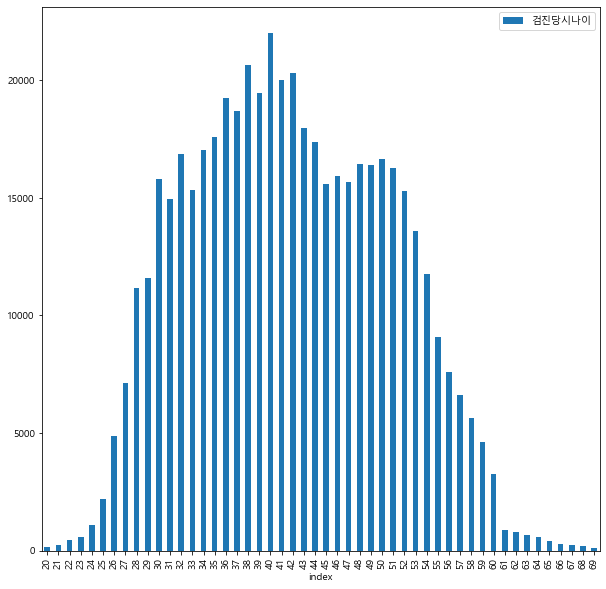

In [625]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [626]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
48,20,170
46,21,229
42,22,430
40,23,595
36,24,1091
35,25,2171
32,26,4857
29,27,7141
26,28,11145
25,29,11584


# 검진항목 시각화

In [627]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target
count,507068.000000,5.070680e+05,5.070680e+05,507068.0,507068.000000,507068.000000,507068.000000,507068.000000,507068.000000
mean,2021.979115,5.127738e+05,1.493933e+06,1.0,41.813262,2.626103,143.527283,143.527283,121.764304
std,1.620627,3.660610e+05,8.185896e+05,0.0,8.773411,0.352706,52.464272,52.464272,26.231260
min,2010.000000,3.200000e+01,1.430000e+02,1.0,20.000000,1.200000,0.000000,0.000000,50.000000
25%,2021.000000,2.229750e+05,6.491548e+05,1.0,35.000000,2.400000,114.870000,114.870000,107.000000
50%,2022.000000,3.826935e+05,1.394266e+06,1.0,41.000000,2.600000,154.610000,154.610000,127.000000
75%,2023.000000,8.416092e+05,2.217688e+06,1.0,49.000000,2.900000,188.050000,188.050000,144.000000
max,2024.000000,1.473602e+06,2.871357e+06,1.0,69.000000,3.500000,203.900000,203.900000,152.000000


<AxesSubplot:xlabel='검진당시나이'>

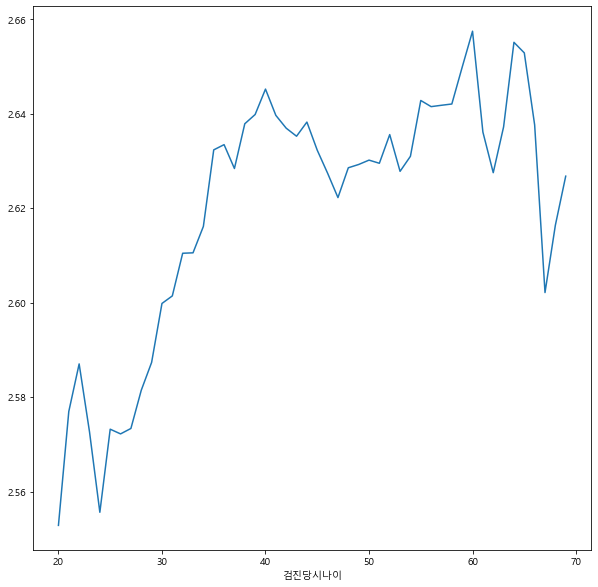

In [628]:
df_man.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

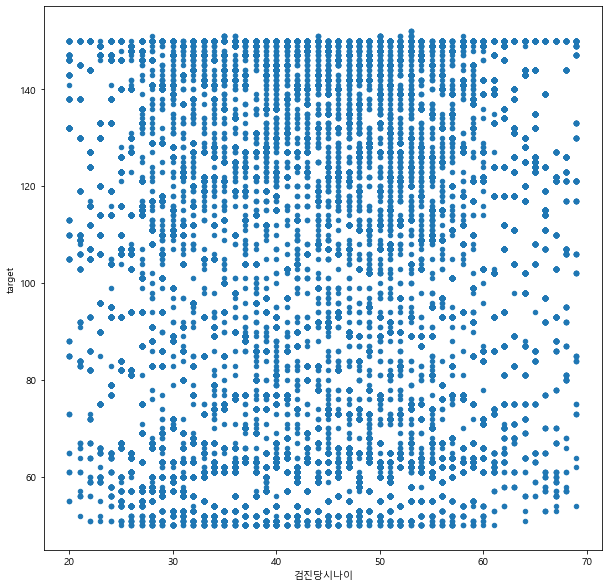

In [629]:
df_man.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

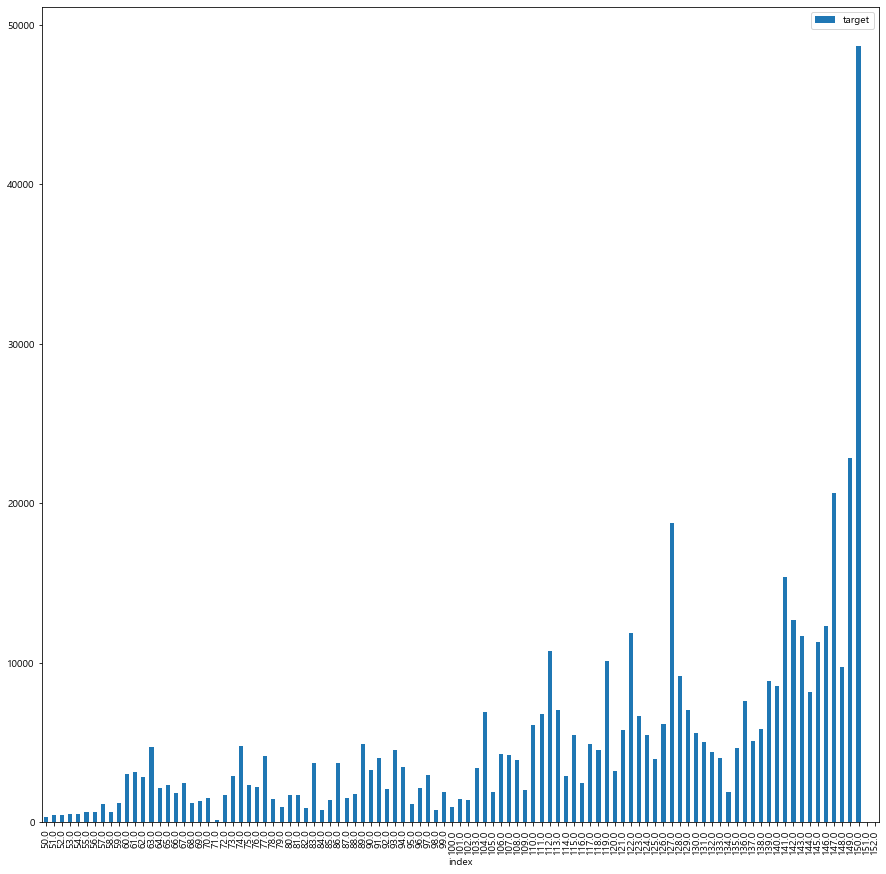

In [630]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [631]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
99,50.0,343
98,51.0,442
97,52.0,461
96,53.0,495
95,54.0,519
94,55.0,623
93,56.0,631
86,57.0,1173
92,58.0,660
84,59.0,1202


In [632]:
df_man_sampling = pd.DataFrame()

# for target in range(int(df_man['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_man[df_man['target'] == target])
    right_len = len(df_man[df_man['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == 100]])                    

In [633]:
# df_man = df_man_sampling.copy()

<AxesSubplot:xlabel='index'>

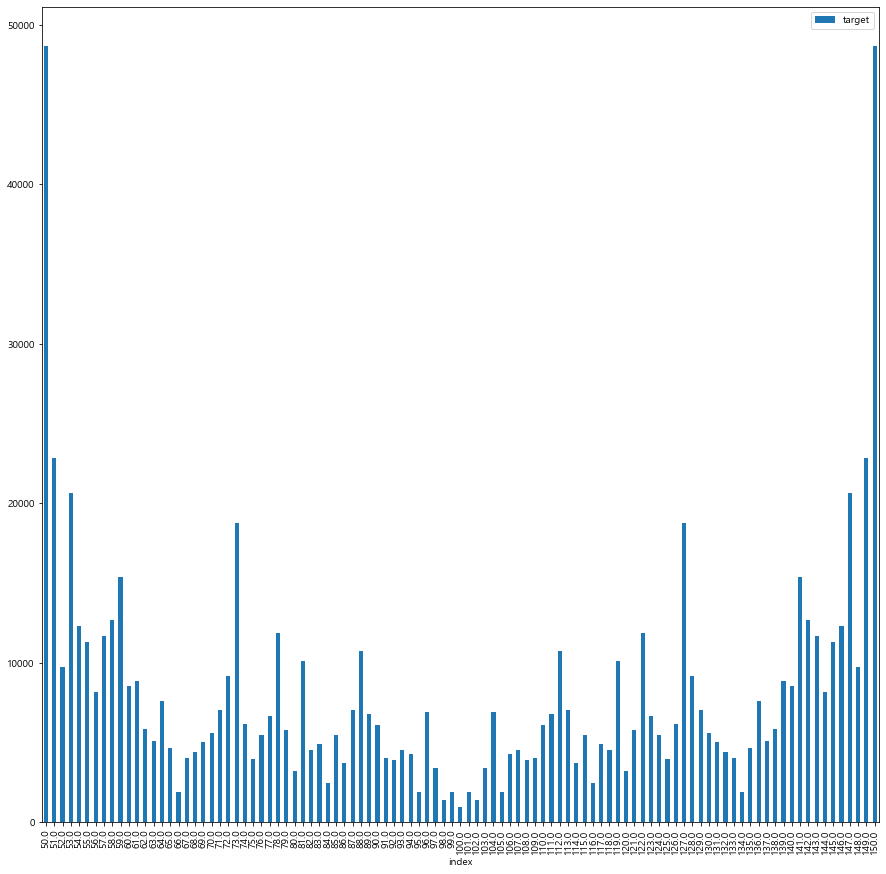

In [634]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [635]:
df_man_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
0,50.0,48690
2,51.0,22864
25,52.0,9745
4,53.0,20674
12,54.0,12331
19,55.0,11302
33,56.0,8168
17,57.0,11690
10,58.0,12701
9,59.0,15356


# 나이별 확인하기

In [636]:
# target = 'target'

In [637]:
# df_man_sample = None
                 
# for idx in range(int(df_man[target].min()), int(df_man[target].max() + 1)):    
#     if len(df_man[df_man[target] == idx]) > 0:
#         temp_ = df_man[df_man[target] == idx].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#         df_man_sample = pd.concat([df_man_sample, temp_])

# df_man_sample.sample(frac=1).reset_index(drop=True, inplace=True)

In [638]:
# df_man = df_man_sample

In [639]:
# int(df_man['검진당시나이'].value_counts().mean())

In [640]:
# df_man['검진당시나이'].min()

In [641]:
# df_man['검진당시나이'].max()

In [642]:
# df_man.columns

In [643]:
# df_temp = None
# # sample_len = int(df_man['검진당시나이'].value_counts().mean())
# # sample_len = 1000
                 
# for age in range(df_man['검진당시나이'].min(), df_man['검진당시나이'].max()):
#     temp_ = df_man[df_man['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [644]:
# df_temp.info()

In [645]:
# df_temp.reset_index(drop=True, inplace=True)

In [646]:
# df_man = df_temp.copy()

In [647]:
# df_man['검진당시나이'].value_counts()

In [648]:
# df_man[df_man['검진당시나이']==38]

In [649]:
# df_man[df_man['검진당시나이']==38]['UID'].value_counts()

# model train

In [650]:
df_man.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '글로블린', '글로블린_kde',
       'kde_mean', 'target'],
      dtype='object')

In [651]:
# train_columns = [
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)',
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                  ]

In [652]:
target_cols

['글로블린']

In [653]:
train_columns = target_cols.copy()

In [654]:
train_columns.insert(0, '검진당시나이')

In [655]:
target_cols

['글로블린']

In [656]:
train_columns

['검진당시나이', '글로블린']

In [657]:
target_col = 'target'

## Min Max Scaling

In [658]:
from sklearn.preprocessing import MinMaxScaler

In [659]:
scaling_bool

False

In [660]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_man_sampling[train_columns])
    df_man_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

## train_test_split

In [661]:
if scaling_bool:
    X_train, X_test, y_train, y_test = train_test_split(df_man_scaled[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)
else :
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [662]:
# model = LinearRegression()

In [663]:
# model.fit(X_train, y_train)

In [664]:
# model.intercept_

In [665]:
# model.coef_

## Randomized SearchCV, 파라미터 튜닝

In [666]:
model = XGBRegressor()

In [667]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [668]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [669]:
import time
start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

RandomizedSearchCV took 2634.17 seconds for 10 candidates parameter settings.


In [670]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.4,
 'booster': 'gbtree'}

In [671]:
# best score
random_search.best_score_

-0.0020401791609806624

In [672]:
model = random_search.best_estimator_
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.4,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.400000006,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [673]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [674]:
# model = build_model()

In [675]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [676]:
# model.summary()

In [677]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [678]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [679]:
# plot_history(history)

## pyTorch 신경망

In [680]:
np.shape(X_train)[1]

2

In [681]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [682]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [683]:
# epochs = 1000

In [684]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [685]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [686]:
# plt.plot(losses)

## coef 계산

In [687]:
# df_coef = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model.coef_).reset_index(drop=True)], axis=1)

In [688]:
# df_coef.columns = ['검사항목', 'coef']

In [689]:
# df_coef['coef'] = df_coef['coef'].round(4)

In [690]:
# df_coef['abs_coef'] = df_coef['coef'].abs()

In [691]:
# df_coef.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [692]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)

In [693]:
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

In [694]:
# slr = LinearRegression()

In [695]:
# slr.fit(X_train_poly, y_train)

In [696]:
# np.shape(X_train)

In [697]:
# np.shape(X_train_poly)

In [698]:
# np.shape(X_test)

In [699]:
# np.shape(X_test_poly)

In [700]:
# y_pred_poly = slr.predict(X_test_poly)

In [701]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test, y_pred_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test, y_pred_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_poly)))

In [702]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred_poly)

# model save

In [703]:
import pickle
with open(model_path_man,'wb') as f:
    pickle.dump(model, f)

In [704]:
import pickle
with open(model_path_man, 'rb') as f:
    model = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [705]:
pyTorch_bool

False

In [706]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model.eval()
        y_pred = model(X_test)
        y_pred = y_pred.numpy()

## XGBRegressor

In [707]:
XGB_bool

True

In [708]:
if XGB_bool:
    y_pred = model.predict(X_test)

In [709]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test, y_pred))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test, y_pred))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 0.009696782276251153
MSE : 0.001334276367517661
RMSE : 0.03652774791193211


In [710]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9999989582020311

In [711]:
model.score(X_test, y_test)

0.9999989582020311

## feature importance

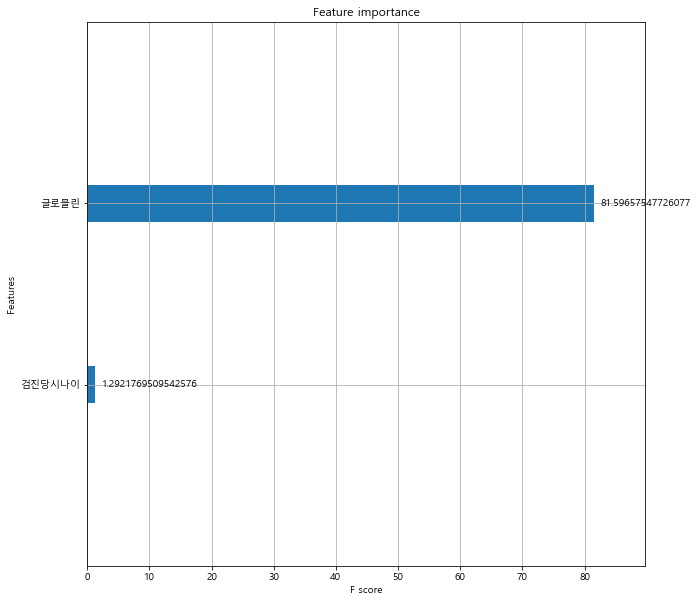

In [712]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model, importance_type='gain')

In [713]:
model.feature_importances_

array([0.01558929, 0.9844107 ], dtype=float32)

In [714]:
df_feature = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model.feature_importances_)], axis=1)
df_feature.columns = ['columns', 'feature_importance']

In [715]:
df_feature.sort_values('feature_importance', ascending=False)

,columns,feature_importance
1,글로블린,0.984411
0,검진당시나이,0.015589


# 실제지수 - 예측지수 결과

In [716]:
pd.DataFrame(y_test).reset_index(drop=True)

,target
0,145.0
1,129.0
2,55.0
3,145.0
4,54.0
...,...
203926,55.0
203927,50.0
203928,71.0
203929,53.0


In [717]:
pd.DataFrame(y_pred).reset_index(drop=True)

,0
0,145.015335
1,129.014618
2,55.000950
3,145.000275
4,54.002502
...,...
203926,55.000950
203927,49.999062
203928,71.000519
203929,53.002548


In [718]:
df_test = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

In [719]:
df_test.head()

,target,0
0,145.0,145.015335
1,129.0,129.014618
2,55.0,55.000950
3,145.0,145.000275
4,54.0,54.002502


In [720]:
df_test.columns

Index(['target', 0], dtype='object')

In [721]:
df_test.columns = ['실제지수', '예측지수']

In [722]:
df_test['diff'] = df_test['예측지수'] - df_test['실제지수']

In [723]:
df_test.head()

,실제지수,예측지수,diff
0,145.0,145.015335,0.015335
1,129.0,129.014618,0.014618
2,55.0,55.000950,0.000950
3,145.0,145.000275,0.000275
4,54.0,54.002502,0.002502


In [724]:
df_test['diff_int'] = df_test['diff'].round(0)

In [725]:
len(df_test)

203931

In [726]:
df_test.head()

,실제지수,예측지수,diff,diff_int
0,145.0,145.015335,0.015335,0.0
1,129.0,129.014618,0.014618,0.0
2,55.0,55.000950,0.000950,0.0
3,145.0,145.000275,0.000275,0.0
4,54.0,54.002502,0.002502,0.0


<AxesSubplot:>

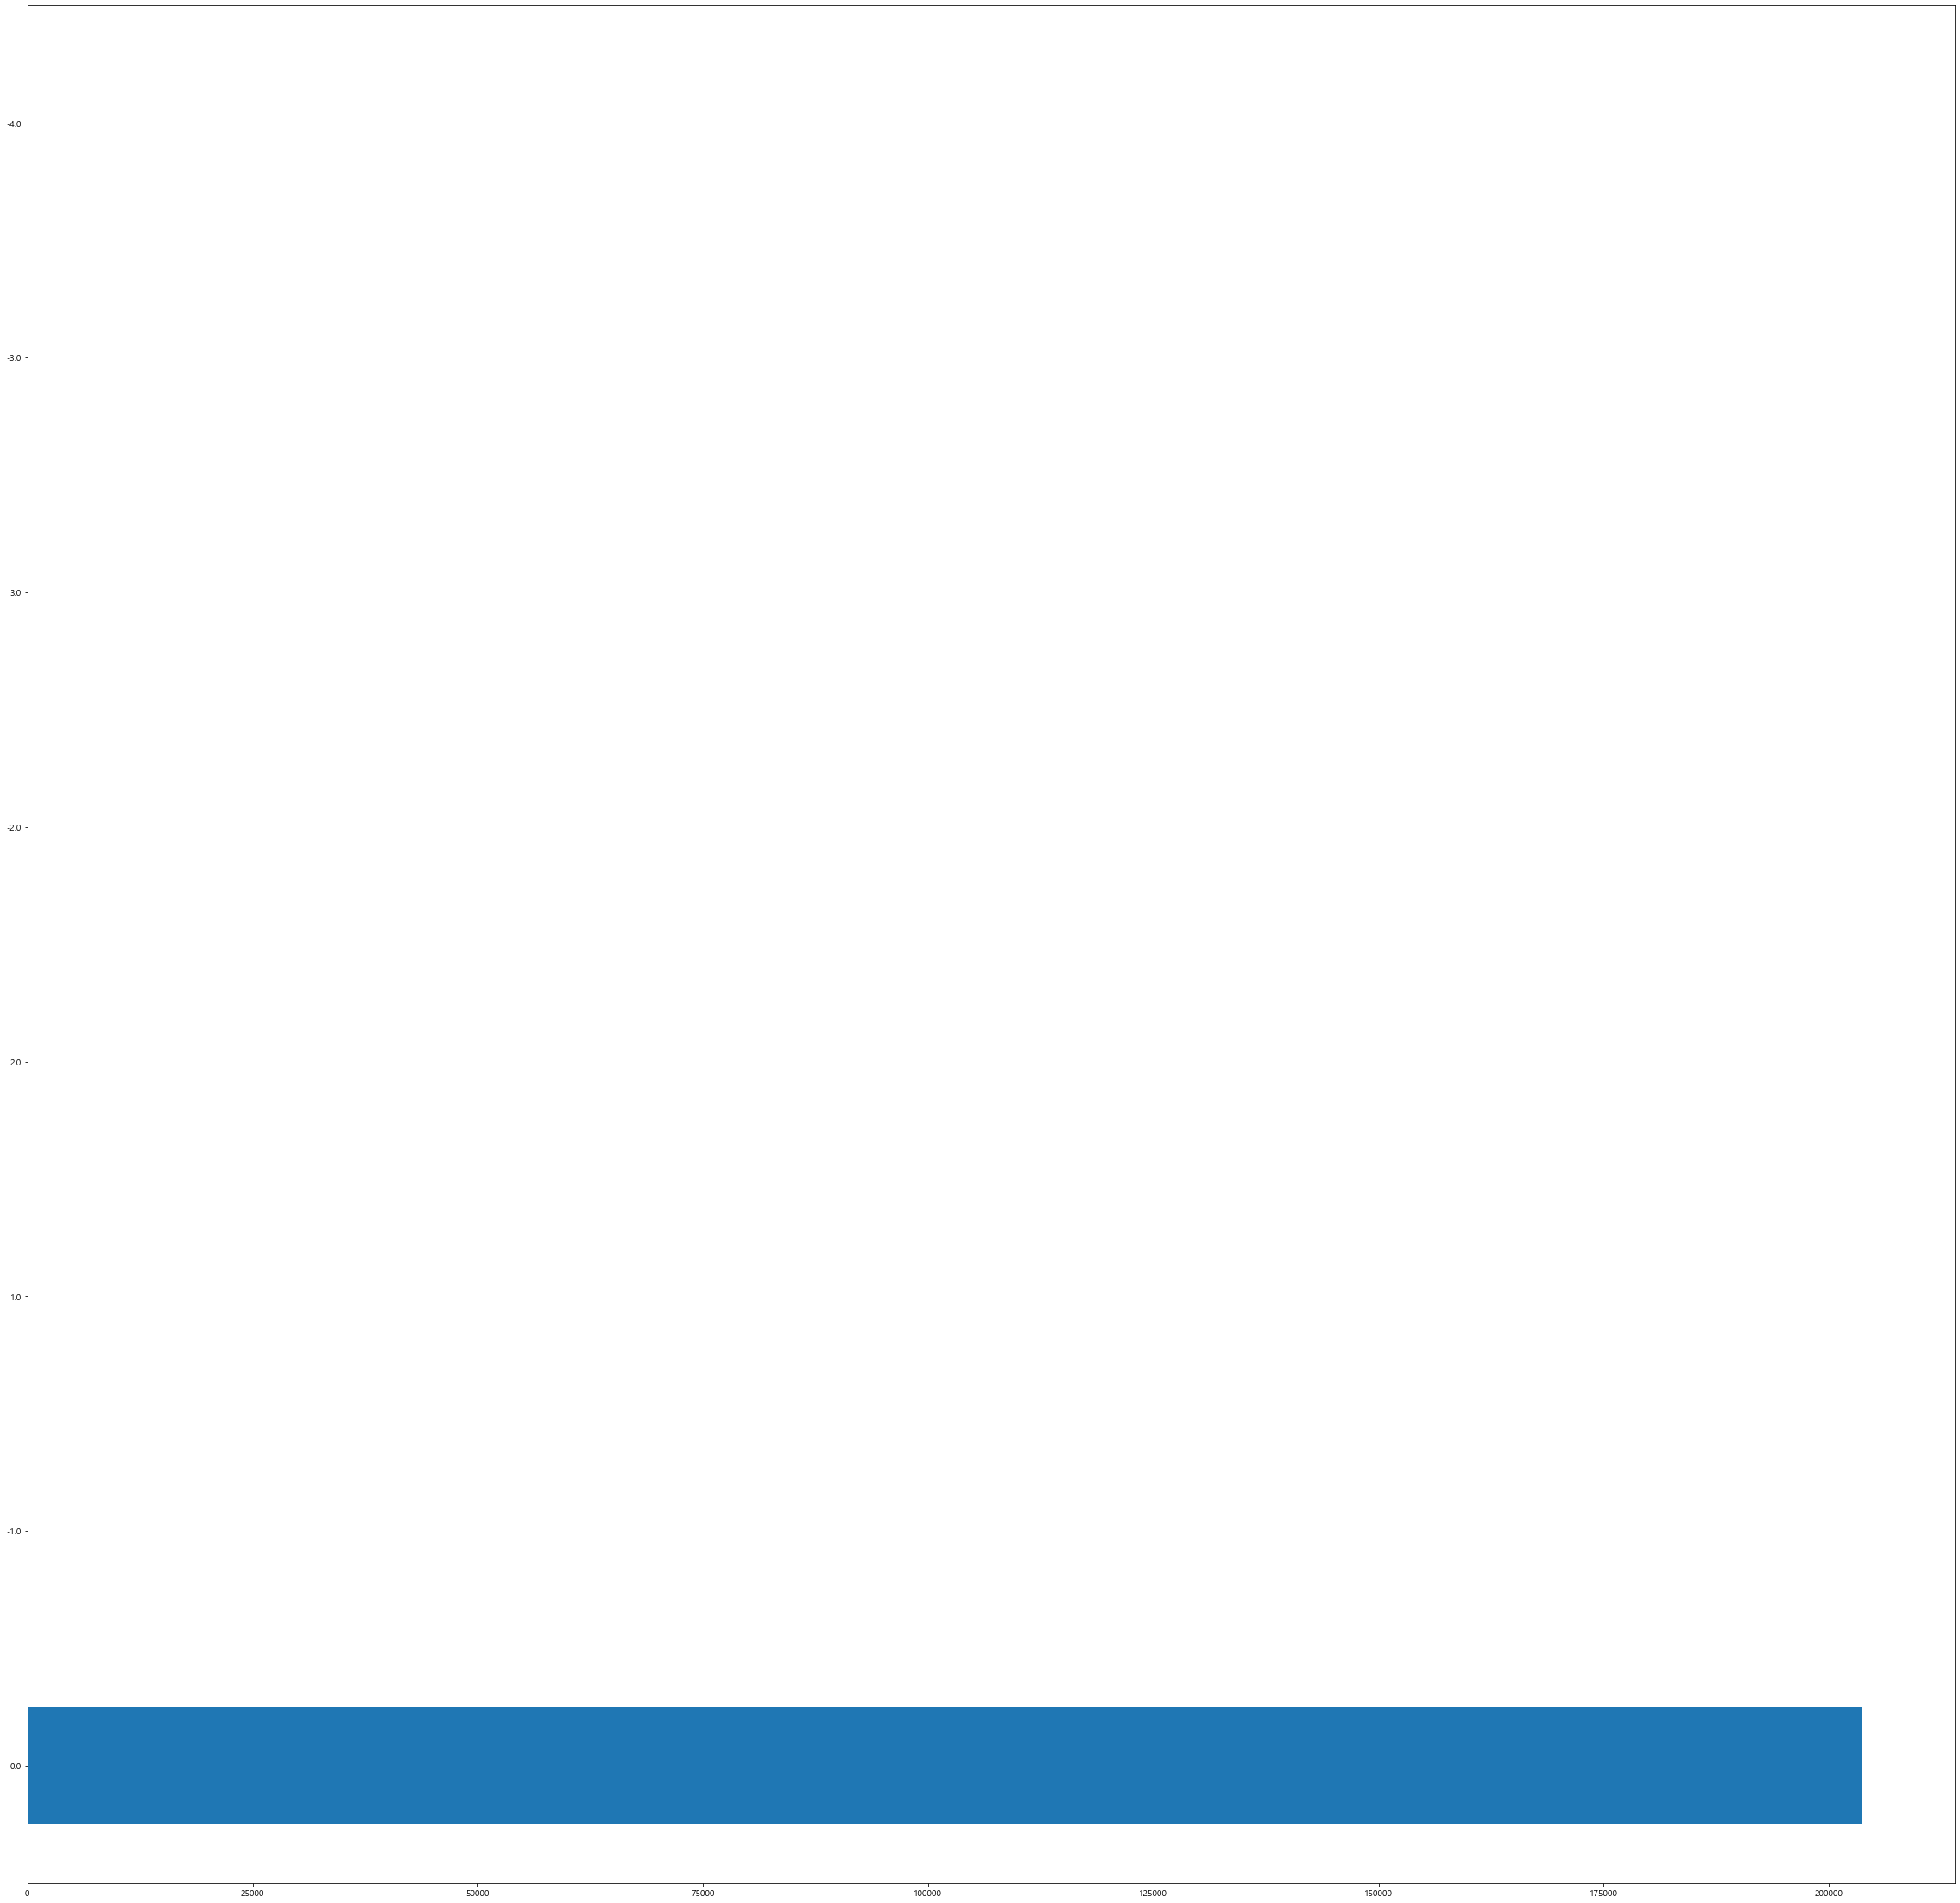

In [727]:
plt.figure(figsize=(40, 40))
df_test['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_남자.png')

In [728]:
df_test['diff_int'].value_counts(ascending=False)

 0.0    203768
-1.0        87
 1.0        54
 2.0        10
-2.0         7
 3.0         2
-3.0         2
-4.0         1
Name: diff_int, dtype: int64

In [729]:
df_test['예측지수'].round(0).value_counts()

50.0     12218
150.0    12178
149.0     5674
51.0      5661
53.0      5174
147.0     5096
127.0     4718
73.0      4697
59.0      3846
141.0     3744
142.0     3236
58.0      3181
146.0     3109
54.0      3056
143.0     3015
78.0      2901
122.0     2894
57.0      2862
145.0     2839
88.0      2707
55.0      2704
112.0     2660
81.0      2568
119.0     2551
148.0     2402
52.0      2401
72.0      2296
128.0     2257
61.0      2248
139.0     2242
140.0     2227
60.0      2163
144.0     2084
56.0      2076
136.0     1919
64.0      1901
71.0      1792
104.0     1783
129.0     1774
87.0      1769
96.0      1732
111.0     1727
113.0     1710
77.0      1691
89.0      1688
123.0     1642
126.0     1556
90.0      1555
110.0     1552
74.0      1518
138.0     1488
121.0     1468
62.0      1445
79.0      1444
70.0      1433
124.0     1408
130.0     1404
85.0      1357
115.0     1356
76.0      1327
137.0     1289
69.0      1278
131.0     1264
83.0      1251
117.0     1228
63.0      1227
135.0     

# 예측 나이 분포

In [730]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_train_pred = model(X_train)
        X_train_pred = X_train_pred.numpy()

    df_train = pd.DataFrame(X_train_pred).reset_index(drop=True)
    y_test = pd.DataFrame(y_test.numpy())

In [731]:
if XGB_bool:
    df_train = pd.DataFrame(model.predict(X_train)).reset_index(drop=True)

In [732]:
# df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [733]:
df_plot = pd.DataFrame(y_test.value_counts())

In [734]:
df_plot.columns = ['count']

In [735]:
df_plot.reset_index(inplace=True)

In [736]:
df_plot = df_plot.sort_values('index', ascending=True)

In [737]:
df_plot

,index,count
0,50.0,12218
3,51.0,5661
24,52.0,2401
4,53.0,5174
13,54.0,3056
20,55.0,2704
33,56.0,2076
17,57.0,2862
11,58.0,3181
8,59.0,3846


In [738]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

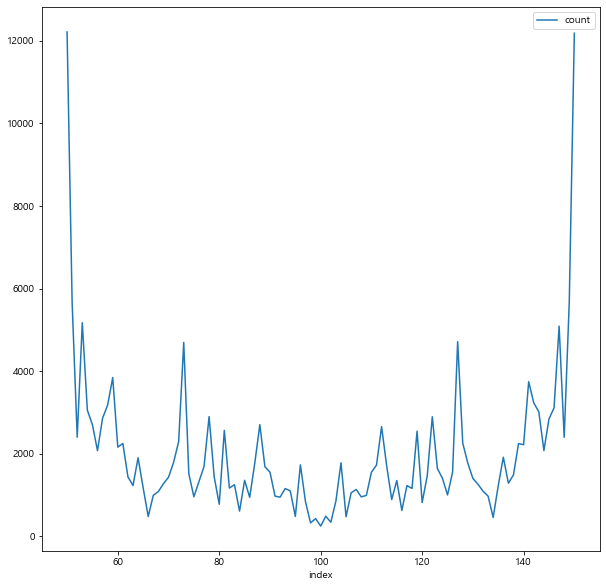

In [739]:
df_plot.plot()

In [740]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_test_pred = model(X_test)
        X_test_pred = X_test_pred.numpy()
    df_test = pd.DataFrame(X_test_pred).reset_index(drop=True)

In [741]:
if XGB_bool:
    df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [742]:
df_plot = pd.DataFrame(df_test.round(0).value_counts())

In [743]:
df_plot.columns = ['count']

In [744]:
df_plot.reset_index(inplace=True)

In [745]:
df_plot = df_plot.sort_values(0, ascending=True)

In [746]:
df_plot.set_index(0, inplace=True)

In [747]:
df_plot

,count
0,
50.0,12218
51.0,5661
52.0,2401
53.0,5174
54.0,3056
55.0,2704
56.0,2076
57.0,2862
58.0,3181


<AxesSubplot:xlabel='0'>

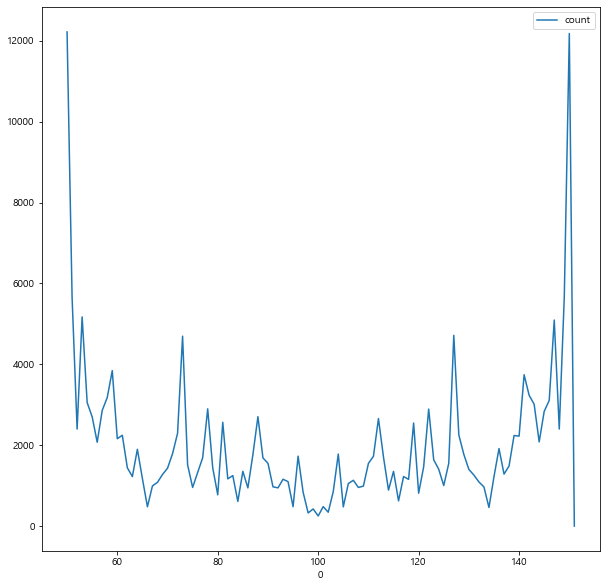

In [748]:
df_plot.plot()

# 시각화

In [749]:
# model.coef_

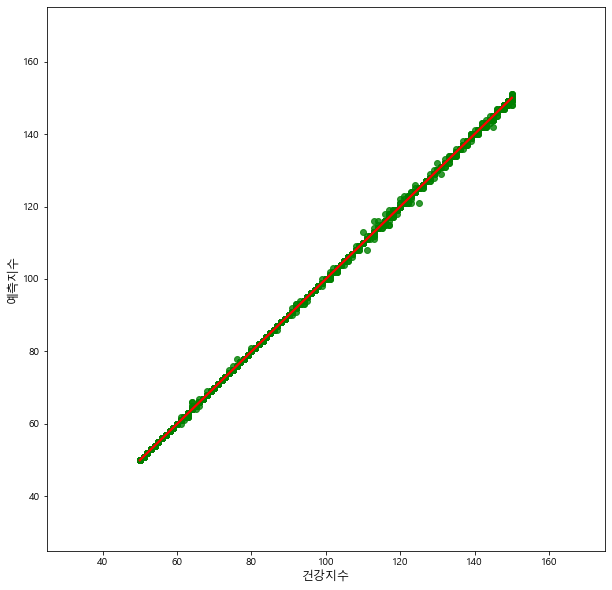

In [878]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), df_test.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 남성 데이터 전체 계산

In [879]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target
0,2011,32,11757,1,24,2.3,165.32,165.32,133.0
1,2019,50,356493,1,53,2.8,160.60,160.60,130.0
2,2021,50,642497,1,55,2.7,189.97,189.97,145.0
3,2019,62,421626,1,40,2.9,145.59,145.59,123.0
4,2020,62,565527,1,41,2.9,162.44,162.44,131.0


In [880]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507068 entries, 0 to 507067
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   검진년도       507068 non-null  int64  
 1   UID        507068 non-null  int64  
 2   CU_REC_ID  507068 non-null  int64  
 3   SEX        507068 non-null  int64  
 4   검진당시나이     507068 non-null  int64  
 5   글로블린       507068 non-null  float64
 6   글로블린_kde   507068 non-null  float64
 7   kde_mean   507068 non-null  float64
 8   target     507068 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 34.8 MB


In [881]:
df_man[df_man['UID'] == 168996]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target
78040,2022,168996,2259500,1,35,2.6,188.05,188.05,144.0
78041,2023,168996,2259499,1,36,2.8,168.13,168.13,134.0
78042,2024,168996,2281994,1,37,2.6,200.00,200.00,150.0


In [882]:
train_columns

['검진당시나이', '글로블린']

In [883]:
if scaling_bool:
    df_pred = df_man_scaled.copy()
else:
    df_pred = df_man.copy()

In [884]:
len(df_pred)

507068

In [885]:
df_pred.reset_index(drop=True, inplace=True)

In [886]:
X_test

,검진당시나이,글로블린
205311,48,2.6
432748,52,2.8
431274,33,1.8
145774,59,2.6
67993,26,1.8
...,...,...
489970,33,1.8
302684,38,1.4
424329,63,3.3
303789,48,1.8


In [887]:
df_pred.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '글로블린', '글로블린_kde',
       'kde_mean', 'target'],
      dtype='object')

In [888]:
df_pred[train_columns]

,검진당시나이,글로블린
0,24,2.3
1,53,2.8
2,55,2.7
3,40,2.9
4,41,2.9
...,...,...
507063,36,2.8
507064,65,1.8
507065,29,2.6
507066,26,2.9


In [889]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        pred_data = model(torch.Tensor(df_pred[train_columns].to_numpy()))
        pred_data = pred_data.numpy()

In [890]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_pred[train_columns])

In [891]:
pred_data = pred_data.round(0)

In [892]:
pred_data

array([133., 130., 145., ..., 141., 106., 150.], dtype=float32)

In [893]:
df_output = pd.concat([df_pred, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [894]:
if scaling_bool:
    df_output = pd.concat([df_man[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output], axis=1)

In [895]:
df_output.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target,예측지수
0,2011,32,11757,1,24,2.3,165.32,165.32,133.0,133.0
1,2019,50,356493,1,53,2.8,160.60,160.60,130.0,130.0
2,2021,50,642497,1,55,2.7,189.97,189.97,145.0,145.0
3,2019,62,421626,1,40,2.9,145.59,145.59,123.0,123.0
4,2020,62,565527,1,41,2.9,162.44,162.44,131.0,131.0
5,2021,62,699357,1,42,2.6,194.86,194.86,147.0,147.0
6,2022,62,1356310,1,43,2.4,179.38,179.38,140.0,140.0
7,2023,62,2170394,1,44,3.1,84.39,84.39,92.0,92.0
8,2022,67,1249745,1,54,2.1,73.73,73.73,87.0,87.0
9,2022,76,1377275,1,52,2.3,126.78,126.78,113.0,113.0


## 예측지수 성능평가

In [896]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['target'], df_output['예측지수'])

0.001522478247493433

# target으로 나이 계산

In [897]:
df_output['예측나이'] = ((100 - df_output['예측지수']) / 5) + df_output['검진당시나이']
df_output['예측나이'] = df_output['예측나이'].round(2)

In [898]:
df_output.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,2.3,165.32,165.32,133.0,133.0,17.4
1,2019,50,356493,1,53,2.8,160.60,160.60,130.0,130.0,47.0
2,2021,50,642497,1,55,2.7,189.97,189.97,145.0,145.0,46.0
3,2019,62,421626,1,40,2.9,145.59,145.59,123.0,123.0,35.4
4,2020,62,565527,1,41,2.9,162.44,162.44,131.0,131.0,34.8
5,2021,62,699357,1,42,2.6,194.86,194.86,147.0,147.0,32.6
6,2022,62,1356310,1,43,2.4,179.38,179.38,140.0,140.0,35.0
7,2023,62,2170394,1,44,3.1,84.39,84.39,92.0,92.0,45.6
8,2022,67,1249745,1,54,2.1,73.73,73.73,87.0,87.0,56.6
9,2022,76,1377275,1,52,2.3,126.78,126.78,113.0,113.0,49.4


## 예측나이 성능평가

In [899]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['검진당시나이'], df_output['예측나이'])

6.128773261179961

# 최종 산출

In [900]:
df_output.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,2.3,165.32,165.32,133.0,133.0,17.4
1,2019,50,356493,1,53,2.8,160.60,160.60,130.0,130.0,47.0
2,2021,50,642497,1,55,2.7,189.97,189.97,145.0,145.0,46.0
3,2019,62,421626,1,40,2.9,145.59,145.59,123.0,123.0,35.4
4,2020,62,565527,1,41,2.9,162.44,162.44,131.0,131.0,34.8


# DataMart csv

In [901]:
df_copy = df.copy()

In [902]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린
0,2010,7282,2520,1,42,NaN
1,2010,7490,3638,1,39,2.4
2,2010,7915,3997,1,36,3.0
3,2010,8056,4745,1,42,2.5
4,2010,8457,3929,1,38,3.1


In [903]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1213899 non-null  int64  
 1   UID        1213899 non-null  int64  
 2   CU_REC_ID  1213899 non-null  int64  
 3   SEX        1213899 non-null  int64  
 4   검진당시나이     1213899 non-null  int64  
 5   글로블린       962998 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 55.6 MB


In [904]:
minimums

[1.15]

In [905]:
maximums

[4.15]

In [906]:
train_columns

['검진당시나이', '글로블린']

In [907]:
target_cols

['글로블린']

In [908]:
for idx, col in enumerate(target_cols):    
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [909]:
df_man_csv = df_copy[df_copy['SEX'] == 1]
len(df_man_csv)

765459

In [910]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린
0,2010,7282,2520,1,42,NaN
1,2010,7490,3638,1,39,2.4
2,2010,7915,3997,1,36,3.0
3,2010,8056,4745,1,42,2.5
4,2010,8457,3929,1,38,3.1


## 검진 항목 all 결측치 지우기

In [911]:
target_cols

['글로블린']

In [912]:
df_man_csv.dropna(subset=target_cols, how='all', inplace=True)

In [913]:
df_man_csv.reset_index(drop=True, inplace=True)

In [914]:
len(df_man_csv)

607335

## fillna

In [915]:
df_man_csv.fillna(df_man.mean().round(2), inplace=True)

## 글로블린 스크리닝

In [916]:
screening = 3.5

In [917]:
scr_col = '글로블린'

In [918]:
df_man_csv[df_man_csv[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린
43,2010,144568,2565,1,28,4.1
155,2010,361301,2274,1,37,3.8
205,2010,481525,3671,1,34,3.8
212,2010,494402,3994,1,42,3.6
215,2010,495706,3702,1,46,3.8


In [919]:
len(df_man_csv[df_man_csv[scr_col] > screening])

6950

In [920]:
df_man_csv.loc[df_man_csv[scr_col] > screening, scr_col] = screening

In [921]:
df_man_csv[df_man_csv[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린


In [922]:
len(df_man_csv[df_man_csv[scr_col] > screening])

0

In [923]:
len(df_man_csv)

607335

## 모델 예측

In [924]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_man_csv[train_columns])

In [925]:
pred_data = pred_data.round(0)

In [926]:
df_man_csv = pd.concat([df_man_csv, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [927]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,예측지수
0,2010,7490,3638,1,39,2.4,128.0
1,2010,7915,3997,1,36,3.0,119.0
2,2010,8056,4745,1,42,2.5,150.0
3,2010,8457,3929,1,38,3.1,96.0
4,2010,8634,4751,1,43,2.5,148.0


### 성능 평가

In [928]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_man_csv['target'], df_man_csv['예측지수']))

In [929]:
# r2_score(df_man_csv['target'], df_man_csv['예측지수'])

## 예측나이 계산

In [930]:
df_man_csv['예측나이'] = ((100 - df_man_csv['예측지수']) / 5) + df_man_csv['검진당시나이']
df_man_csv['예측나이'] = df_man_csv['예측나이'].round(2)

### 성능 평가

In [931]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_man_csv['검진당시나이'], df_man_csv['예측나이']))

In [932]:
# r2_score(df_man_csv['검진당시나이'], df_man_csv['예측나이'])

In [933]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,예측지수,예측나이
0,2010,7490,3638,1,39,2.4,128.0,33.4
1,2010,7915,3997,1,36,3.0,119.0,32.2
2,2010,8056,4745,1,42,2.5,150.0,32.0
3,2010,8457,3929,1,38,3.1,96.0,38.8
4,2010,8634,4751,1,43,2.5,148.0,33.4


In [934]:
df_man_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607335 entries, 0 to 607334
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   검진년도       607335 non-null  int64  
 1   UID        607335 non-null  int64  
 2   CU_REC_ID  607335 non-null  int64  
 3   SEX        607335 non-null  int64  
 4   검진당시나이     607335 non-null  int64  
 5   글로블린       607335 non-null  float64
 6   예측지수       607335 non-null  float32
 7   예측나이       607335 non-null  float64
dtypes: float32(1), float64(2), int64(5)
memory usage: 34.8 MB


# 최종 UID별 확인

In [935]:
# 김태현 본부장님
df_man_csv[df_man_csv['UID'] == 175673].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,예측지수,예측나이
213266,2022,175673,751348,1,48,2.6,145.0,39.0
213267,2022,175673,1463838,1,48,2.6,145.0,39.0
213209,2022,175673,1919125,1,48,2.6,145.0,39.0
213268,2022,175673,2169120,1,48,2.6,145.0,39.0
213210,2022,175673,2223795,1,48,2.6,145.0,39.0
213211,2022,175673,2237465,1,48,2.6,145.0,39.0
213269,2022,175673,2238320,1,48,2.6,145.0,39.0
213270,2022,175673,2246042,1,48,2.6,145.0,39.0
352593,2023,175673,1463893,1,49,2.3,129.0,43.2
352589,2023,175673,1919126,1,49,2.3,129.0,43.2


In [936]:
# 양원영 유닛장님
df_man_csv[df_man_csv['UID'] == 289587].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,예측지수,예측나이
150571,2021,289587,796178,1,47,3.3,66.0,53.8
240597,2022,289587,866076,1,48,2.9,119.0,44.2
240561,2022,289587,2115999,1,48,2.9,119.0,44.2
73175,2022,289587,2603574,1,48,2.9,119.0,44.2
395685,2023,289587,1487447,1,49,3.2,73.0,54.4
395686,2023,289587,2227964,1,49,3.2,73.0,54.4
552463,2024,289587,2243723,1,50,2.7,150.0,40.0
552449,2024,289587,2603575,1,50,2.7,150.0,40.0


In [937]:
# 한...
df_man_csv[df_man_csv['UID'] == 897603].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,예측지수,예측나이
326906,2022,897603,1066133,1,51,2.2,107.0,49.6
326917,2022,897603,1068885,1,51,2.2,107.0,49.6
326918,2022,897603,1728532,1,51,2.2,107.0,49.6
326919,2022,897603,2555144,1,51,2.2,107.0,49.6
472842,2023,897603,1458387,1,52,2.5,139.0,44.2
472843,2023,897603,1728531,1,52,2.5,139.0,44.2
462586,2023,897603,2120063,1,52,2.5,139.0,44.2
462587,2023,897603,2351665,1,52,2.5,139.0,44.2
472844,2023,897603,2555143,1,52,2.5,139.0,44.2
462588,2023,897603,2622260,1,52,2.5,139.0,44.2


In [938]:
# 김명근 팀장님
df_man_csv[df_man_csv['UID'] == 119172].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,예측지수,예측나이
199778,2022,119172,751336,1,41,2.4,145.0,32.0
199779,2022,119172,1432355,1,41,2.4,145.0,32.0
199776,2022,119172,1432476,1,41,2.4,145.0,32.0
199780,2022,119172,2247083,1,41,2.4,145.0,32.0
199781,2022,119172,2252956,1,41,2.4,145.0,32.0
340643,2023,119172,1436742,1,42,2.9,113.0,39.4
340644,2023,119172,2247082,1,42,2.9,113.0,39.4
340645,2023,119172,2252955,1,42,2.9,113.0,39.4
536587,2024,119172,2250063,1,43,2.5,148.0,33.4
536588,2024,119172,2252954,1,43,2.5,148.0,33.4


In [939]:
# 성주용
df_man_csv[df_man_csv['UID'] == 897595].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,예측지수,예측나이
472837,2023,897595,1525045,1,40,2.1,81.0,43.8
472838,2023,897595,1593851,1,40,2.1,81.0,43.8
472835,2023,897595,2005289,1,40,2.1,81.0,43.8
472836,2023,897595,2138998,1,40,2.1,81.0,43.8
459102,2023,897595,2320478,1,40,2.1,81.0,43.8
472839,2023,897595,2328772,1,40,2.1,81.0,43.8
587874,2024,897595,2329051,1,41,1.9,65.0,48.0


In [940]:
# 최재..
df_man_csv[df_man_csv['UID'] == 492764].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,예측지수,예측나이
282891,2022,492764,909688,1,39,2.1,86.0,41.8
282892,2022,492764,1575802,1,39,2.1,86.0,41.8
282895,2022,492764,1668547,1,39,2.1,86.0,41.8
282893,2022,492764,2246777,1,39,2.1,86.0,41.8
282894,2022,492764,2330256,1,39,2.1,86.0,41.8
111088,2022,492764,2343199,1,39,2.1,86.0,41.8
125650,2022,492764,2363393,1,39,2.1,86.0,41.8
125651,2022,492764,2639564,1,39,2.1,86.0,41.8
125652,2022,492764,2703924,1,39,2.1,86.0,41.8
282896,2022,492764,2783328,1,39,2.1,86.0,41.8


In [941]:
# 장경..
df_man_csv[df_man_csv['UID'] == 933936].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,예측지수,예측나이
476718,2023,933936,1431742,1,40,3.0,118.0,36.4
476719,2023,933936,1435266,1,40,3.0,118.0,36.4
589083,2024,933936,2242997,1,41,2.2,103.0,40.4


In [942]:
df_man_csv[df_man_csv['UID'] == 168996].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,예측지수,예측나이
211146,2022,168996,919754,1,35,2.6,144.0,26.2
211147,2022,168996,1425925,1,35,2.6,144.0,26.2
211148,2022,168996,2259500,1,35,2.6,144.0,26.2
350700,2023,168996,1425970,1,36,2.8,134.0,29.2
350701,2023,168996,1475832,1,36,2.8,134.0,29.2
350702,2023,168996,2259499,1,36,2.8,134.0,29.2
541112,2024,168996,2281994,1,37,2.6,150.0,27.0


# 여성 모델

In [943]:
df_target['SEX'].value_counts()

1    764139
2    447629
Name: SEX, dtype: int64

In [944]:
df_woman = df_target[df_target['SEX'] == 2]
len(df_woman)

447629

# 결측치 처리

## 결측치 삭제

In [945]:
# df_woman.dropna(inplace=True)

In [946]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target
806433,2010,710490,213,2,28,3.3,37.99,37.99,69.0
767596,2010,315847,230,2,23,3.1,97.19,97.19,99.0
769966,2010,719072,231,2,24,3.5,22.28,22.28,61.0
1036002,2010,552037,332,2,41,NaN,100.00,100.00,100.0
806434,2010,710522,632,2,28,2.8,183.91,183.91,142.0


## 결측치 평균으로 대체

In [947]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [948]:
# 나이로 group by, 결측치를 평균으로 대체
# df_woman = df_woman.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [949]:
target_cols

['글로블린']

In [950]:
len(df_woman)

447629

In [951]:
df_woman.dropna(subset=target_cols, how='all', inplace=True)

In [952]:
len(df_woman)

354852

In [953]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target
806433,2010,710490,213,2,28,3.3,37.99,37.99,69.0
767596,2010,315847,230,2,23,3.1,97.19,97.19,99.0
769966,2010,719072,231,2,24,3.5,22.28,22.28,61.0
806434,2010,710522,632,2,28,2.8,183.91,183.91,142.0
870857,2010,232950,983,2,32,2.8,165.96,165.96,133.0


In [954]:
len(df_woman)

354852

## fillna

In [955]:
df_woman.mean().round(2)

검진년도            2021.98
UID           496670.67
CU_REC_ID    1481172.76
SEX                2.00
검진당시나이            38.46
글로블린               2.68
글로블린_kde         142.99
kde_mean         142.99
target           121.49
dtype: float64

In [956]:
df_woman.fillna(df_woman.mean().round(2), inplace=True)

In [957]:
# df_woman.fillna(0, inplace=True)

## IterativeImputer

In [958]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_woman))
# df_impute.columns = df_woman.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [959]:
# import time
# start = time.time()
# np_imputed = mice(df_woman.values) # mice 학습시작
# df_woman = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

In [960]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target
806433,2010,710490,213,2,28,3.3,37.99,37.99,69.0
767596,2010,315847,230,2,23,3.1,97.19,97.19,99.0
769966,2010,719072,231,2,24,3.5,22.28,22.28,61.0
806434,2010,710522,632,2,28,2.8,183.91,183.91,142.0
870857,2010,232950,983,2,32,2.8,165.96,165.96,133.0


# 중복 제거

In [961]:
len(df_woman)

354852

In [962]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_woman.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [963]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target
785436,2021,53,2632765,2,26,2.4,163.78,163.78,132.0
785435,2021,53,664316,2,26,2.4,163.78,163.78,132.0
835217,2024,53,2658222,2,29,2.6,190.43,190.43,145.0
839235,2020,54,497669,2,30,2.9,137.17,137.17,119.0
877741,2022,54,1319859,2,32,2.7,183.95,183.95,142.0
897744,2023,54,2039511,2,33,2.3,136.14,136.14,118.0
920555,2024,54,2750990,2,34,2.6,200.00,200.00,150.0
894597,2022,56,1351361,2,33,2.4,160.32,160.32,130.0
894596,2022,56,1019732,2,33,2.4,160.32,160.32,130.0
915376,2023,56,2032999,2,34,2.6,200.00,200.00,150.0


## first만 남겨두고 중복 제거

In [964]:
df_woman = df_woman.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [965]:
df_woman.reset_index(drop=True, inplace=True)

In [966]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target
0,2021,53,2632765,2,26,2.4,163.78,163.78,132.0
1,2024,53,2658222,2,29,2.6,190.43,190.43,145.0
2,2020,54,497669,2,30,2.9,137.17,137.17,119.0
3,2022,54,1319859,2,32,2.7,183.95,183.95,142.0
4,2023,54,2039511,2,33,2.3,136.14,136.14,118.0
5,2024,54,2750990,2,34,2.6,200.00,200.00,150.0
6,2022,56,1351361,2,33,2.4,160.32,160.32,130.0
7,2023,56,2032999,2,34,2.6,200.00,200.00,150.0
8,2021,59,701026,2,29,2.8,154.68,154.68,127.0
9,2022,59,1376992,2,30,2.6,200.00,200.00,150.0


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

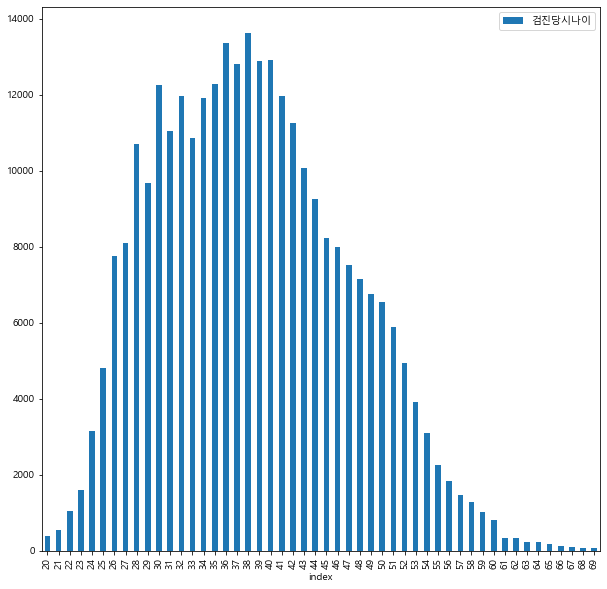

In [967]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [968]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
40,20,377
39,21,547
36,22,1044
33,23,1587
29,24,3151
27,25,4807
20,26,7756
18,27,8091
13,28,10686
15,29,9673


# 검진항목 시각화

In [969]:
df_woman.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target
count,298334.000000,2.983340e+05,2.983340e+05,298334.0,298334.000000,298334.000000,298334.000000,298334.000000,298334.000000
mean,2021.925124,4.917092e+05,1.472780e+06,2.0,38.444971,2.688675,142.894686,142.894686,121.436001
std,1.568706,3.650412e+05,8.190109e+05,0.0,8.464065,0.354987,53.083813,53.083813,26.541375
min,2010.000000,5.300000e+01,2.130000e+02,2.0,20.000000,1.200000,0.000000,0.000000,50.000000
25%,2021.000000,2.151225e+05,6.344995e+05,2.0,32.000000,2.400000,111.280000,111.280000,106.000000
50%,2022.000000,3.673785e+05,1.379090e+06,2.0,38.000000,2.700000,158.750000,158.750000,129.000000
75%,2023.000000,8.189350e+05,2.187799e+06,2.0,44.000000,2.900000,187.310000,187.310000,144.000000
max,2024.000000,1.473590e+06,2.871326e+06,2.0,69.000000,3.500000,203.030000,203.030000,152.000000


<AxesSubplot:xlabel='검진당시나이'>

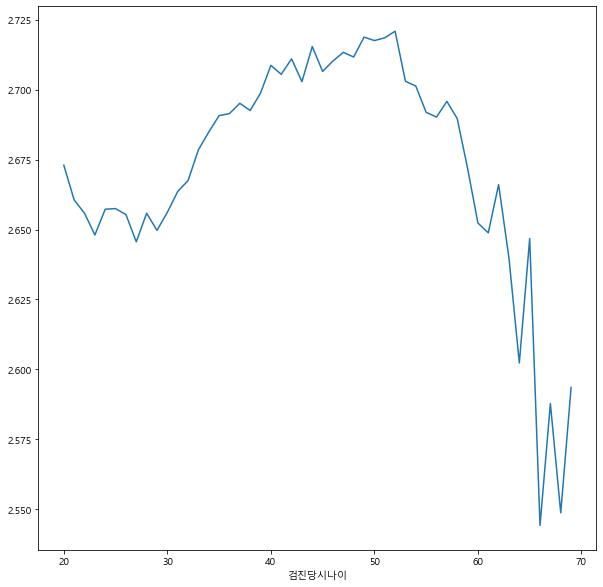

In [970]:
df_woman.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

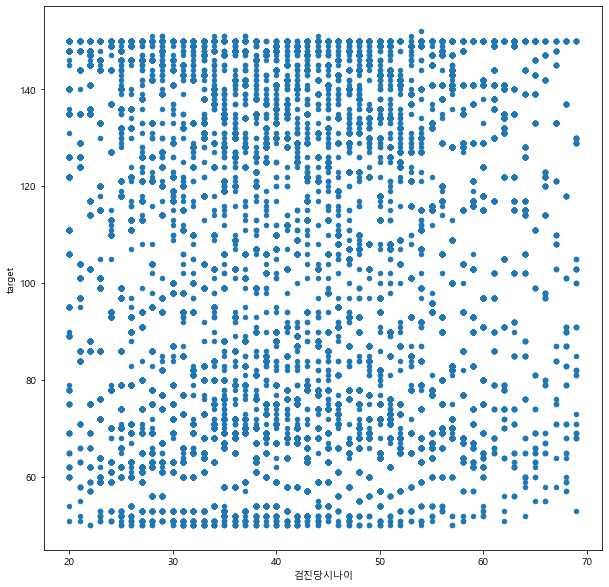

In [971]:
df_woman.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

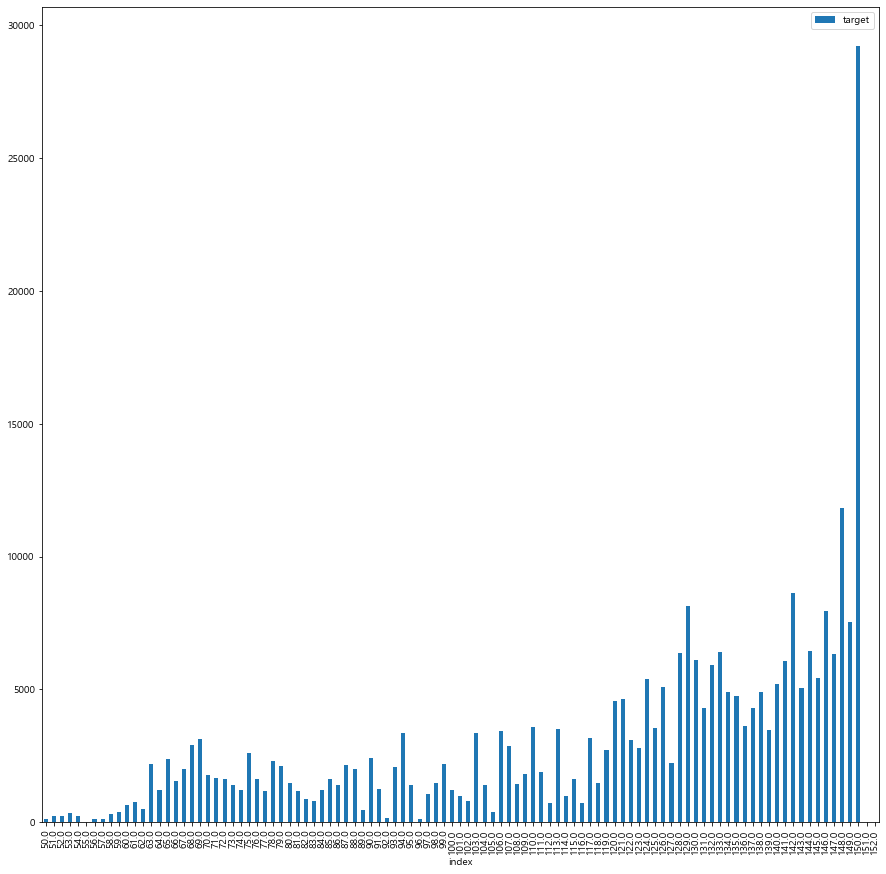

In [972]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [973]:
df_woman['target'].value_counts().reset_index().sort_values('index')

,index,target
97,50.0,132
92,51.0,254
94,52.0,221
90,53.0,359
93,54.0,245
100,55.0,24
98,56.0,129
96,57.0,137
91,58.0,327
89,59.0,390


In [974]:
df_woman_sampling = pd.DataFrame()

# for target in range(int(df_woman['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_woman[df_woman['target'] == target])
    right_len = len(df_woman[df_woman['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == 100]])                    

In [975]:
# df_woman = df_woman_sampling.copy()

<AxesSubplot:xlabel='index'>

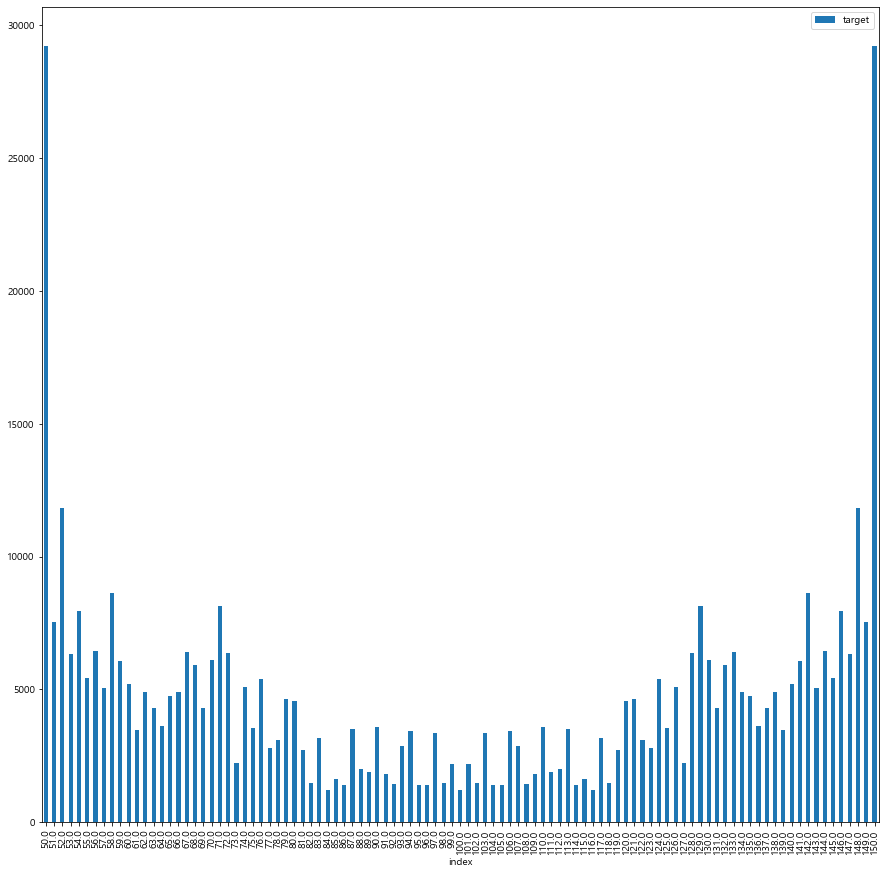

In [976]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [977]:
df_woman_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
0,50.0,29235
10,51.0,7548
2,52.0,11815
19,53.0,6323
8,54.0,7967
27,55.0,5437
12,56.0,6435
34,57.0,5071
5,58.0,8639
22,59.0,6079


# 나이별 확인하기

In [978]:
# df_woman['검진당시나이'].value_counts()

In [979]:
# int(df_woman['검진당시나이'].value_counts().mean())

In [980]:
# df_woman['검진당시나이'].min()

In [981]:
# df_woman['검진당시나이'].max()

In [982]:
# df_woman.columns

In [983]:
# df_temp = None
# # sample_len = int(df_woman['검진당시나이'].value_counts().mean())
# # sample_len = 500
                 
# for age in range(df_woman['검진당시나이'].min(), df_woman['검진당시나이'].max()):
#     temp_ = df_woman[df_woman['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [984]:
# df_temp.info()

In [985]:
# df_temp.reset_index(drop=True, inplace=True)

In [986]:
# df_woman = df_temp.copy()

In [987]:
# df_woman['검진당시나이'].value_counts()

In [988]:
# df_woman[df_woman['검진당시나이']==20]

In [989]:
# df_woman[df_woman['검진당시나이']==20]['UID'].value_counts()

# model train

In [990]:
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '신장', '체중']
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '체중']

In [991]:
train_columns

['검진당시나이', '글로블린']

In [992]:
# target_col = '검진당시나이'

In [993]:
target_col

'target'

## Min Max Scaling

In [994]:
from sklearn.preprocessing import MinMaxScaler

In [995]:
scaling_bool

False

In [996]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_woman_sampling[train_columns])
    df_woman_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

In [997]:
if scaling_bool:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_scaled[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [998]:
# model2 = LinearRegression()

In [999]:
# model2.fit(X_train2, y_train2)

In [1000]:
# model2.intercept_

In [1001]:
# model2.coef_

## Randomized SearchCV, 파라미터 튜닝

In [1002]:
model2 = XGBRegressor()

In [1003]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [1004]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model2, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [1005]:
import time
start = time.time()
random_search.fit(X_train2, y_train2)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

RandomizedSearchCV took 1485.64 seconds for 10 candidates parameter settings.


In [1006]:
# best parameter
random_search.best_params_

{'objective': 'reg:squarederror',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.4,
 'booster': 'gbtree'}

In [1007]:
# best score
random_search.best_score_

-0.004194473337340778

In [1008]:
model2 = random_search.best_estimator_
model2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.4,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.400000006,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Keras

In [1009]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [1010]:
# model = build_model()

In [1011]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [1012]:
# model.summary()

In [1013]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [1014]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [1015]:
# plot_history(history)

## pyTorch 신경망

In [1016]:
np.shape(X_train)[1]

2

In [1017]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [1018]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [1019]:
# epochs = 1000

In [1020]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [1021]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [1022]:
# plt.plot(losses)

## coef 계산

In [1023]:
# df_coef2 = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model2.coef_).reset_index(drop=True)], axis=1)

In [1024]:
# df_coef2.columns = ['검사항목', 'coef']

In [1025]:
# df_coef2['coef'] = df_coef2['coef'].round(4)

In [1026]:
# df_coef2['abs_coef'] = df_coef2['coef'].abs()

In [1027]:
# df_coef2.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [1028]:
# from sklearn.preprocessing import PolynomialFeatures
# poly2 = PolynomialFeatures(degree=1, include_bias=False)

In [1029]:
# X_train2_poly = poly2.fit_transform(X_train2)
# X_test2_poly = poly2.fit_transform(X_test2)

In [1030]:
# slr2 = LinearRegression()

In [1031]:
# slr2.fit(X_train2_poly, y_train2)

In [1032]:
# np.shape(X_train2)

In [1033]:
# np.shape(X_train2_poly)

In [1034]:
# np.shape(X_test2)

In [1035]:
# np.shape(X_test2_poly)

In [1036]:
# y_pred2_poly = slr2.predict(X_test2_poly)

In [1037]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test2, y_pred2_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test2, y_pred2_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2_poly)))

In [1038]:
# from sklearn.metrics import r2_score
# r2_score(y_test2, y_pred2_poly)

# model save

In [1039]:
import pickle
with open(model_path_woman,'wb') as f:
    pickle.dump(model2, f)

In [1040]:
import pickle
with open(model_path_woman, 'rb') as f:
    model2 = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [1041]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model2.eval()
        y_pred2 = model2(X_test2)
        y_pred2 = y_pred2.numpy()

## XGBRegressor

In [1042]:
if XGB_bool:
    y_pred2 = model2.predict(X_test2)

In [1043]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test2, y_pred2))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test2, y_pred2))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2)))

MAE : 0.0030640884742195347
MSE : 0.002908232603718433
RMSE : 0.05392803170632536


In [1044]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

0.9999977608847334

In [1045]:
model2.score(X_test2, y_test2)

0.9999977608847334

## feature importance

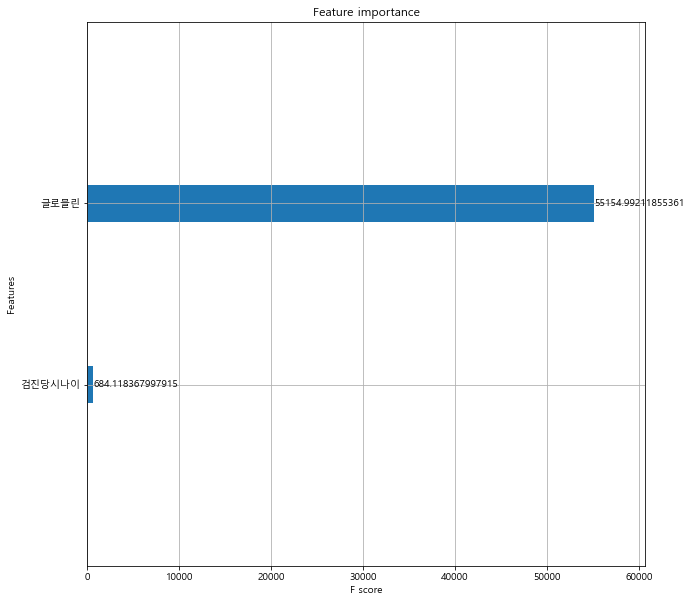

In [1046]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model2, importance_type='gain')

In [1047]:
model2.feature_importances_

array([0.0122516 , 0.98774844], dtype=float32)

In [1048]:
df_feature2 = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model2.feature_importances_)], axis=1)
df_feature2.columns = ['columns', 'feature_importance']

In [1049]:
df_feature2.sort_values('feature_importance', ascending=False)

,columns,feature_importance
1,글로블린,0.987748
0,검진당시나이,0.012252


# 실제나이 - 예측나이 결과

In [1050]:
df_test2 = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), pd.DataFrame(y_pred2).reset_index(drop=True)], axis=1)

In [1051]:
df_test2.head()

,target,0
0,146.0,145.998947
1,131.0,130.999664
2,148.0,147.998474
3,64.0,63.999847
4,94.0,94.005028


In [1052]:
df_test2.columns

Index(['target', 0], dtype='object')

In [1053]:
df_test2.columns = ['실제지수', '예측지수']

In [1054]:
df_test2['diff'] = df_test2['예측지수'] - df_test2['실제지수']

In [1055]:
df_test2.head()

,실제지수,예측지수,diff
0,146.0,145.998947,-0.001053
1,131.0,130.999664,-0.000336
2,148.0,147.998474,-0.001526
3,64.0,63.999847,-0.000153
4,94.0,94.005028,0.005028


In [1056]:
df_test2['diff_int'] = df_test2['diff'].round(0)

In [1057]:
len(df_test2)

118498

In [1058]:
df_test2.head()

,실제지수,예측지수,diff,diff_int
0,146.0,145.998947,-0.001053,-0.0
1,131.0,130.999664,-0.000336,-0.0
2,148.0,147.998474,-0.001526,-0.0
3,64.0,63.999847,-0.000153,-0.0
4,94.0,94.005028,0.005028,0.0


<AxesSubplot:>

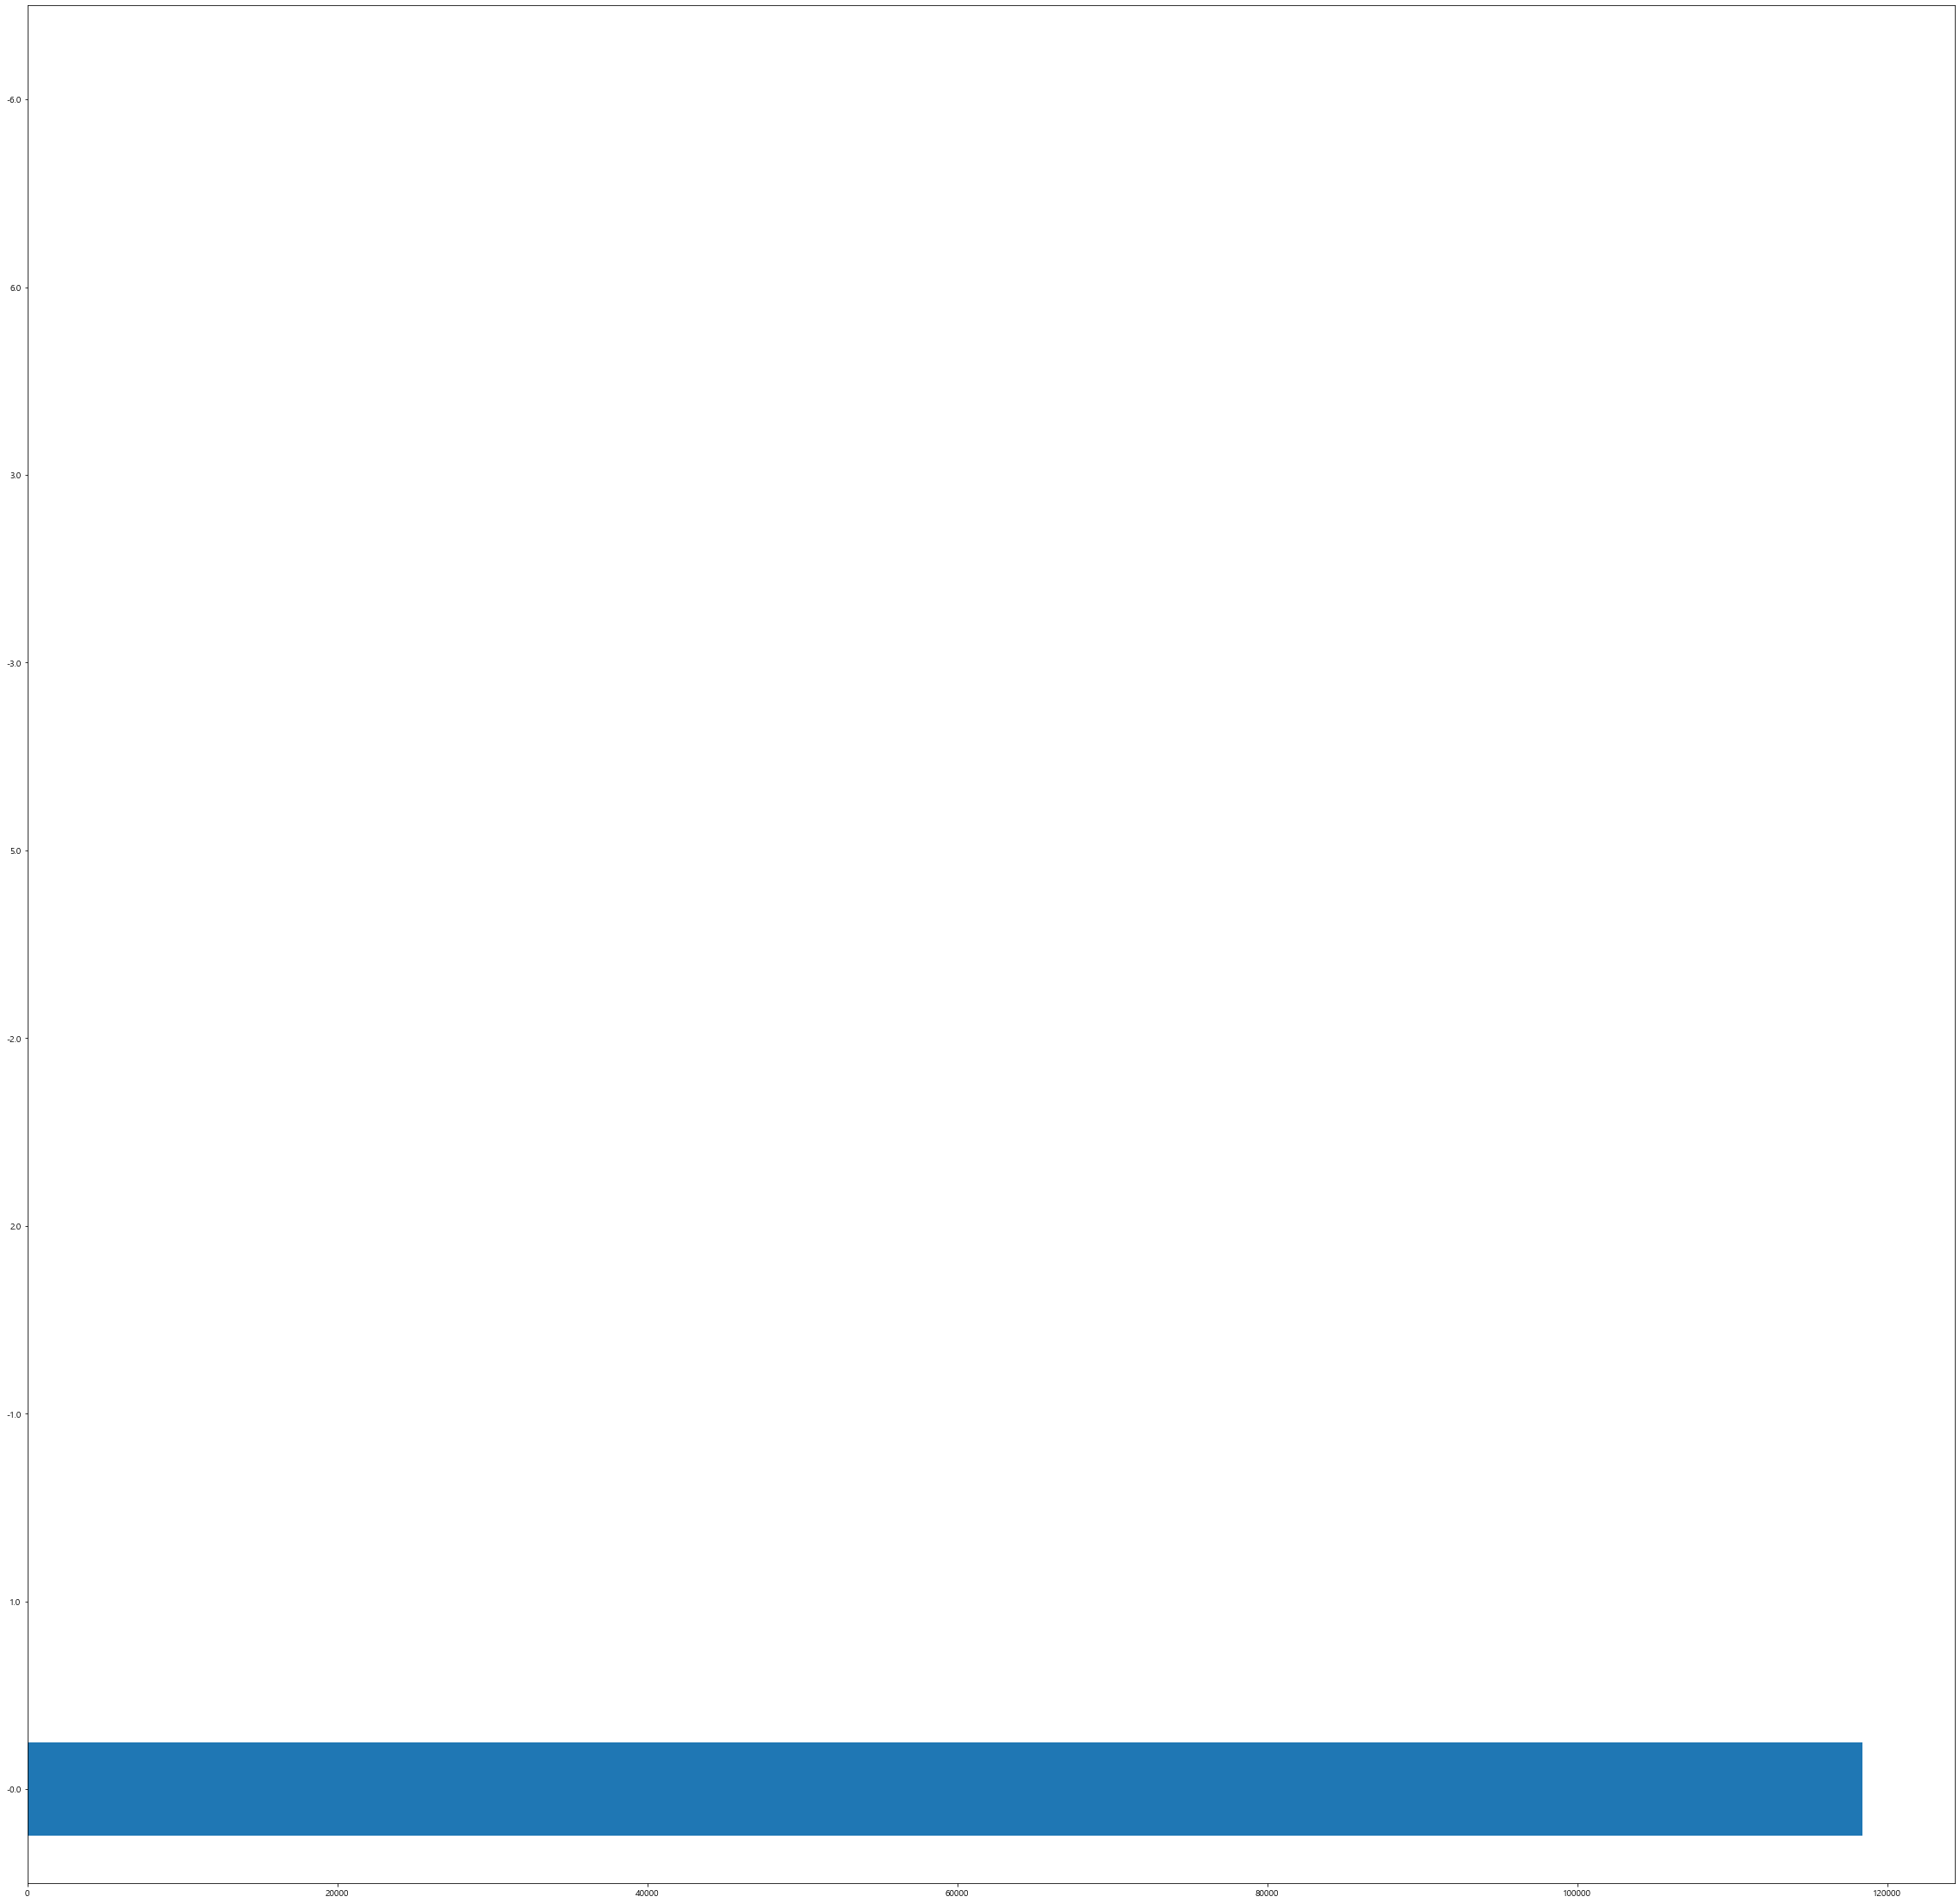

In [1059]:
plt.figure(figsize=(40, 40))
df_test2['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_여자.png')

# 예측 나이 분포

In [1060]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_train_pred2 = model2(X_train2)
        X_train_pred2 = X_train_pred2.numpy()

    df_train2 = pd.DataFrame(X_train_pred2).reset_index(drop=True)
    y_test2 = pd.DataFrame(y_test2.numpy())

In [1061]:
if XGB_bool:
    df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [1062]:
df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [1063]:
df_train2.round(0).value_counts()

150.0    21933
50.0     21818
148.0     8948
52.0      8844
58.0      6486
142.0     6444
129.0     6159
71.0      6146
146.0     5968
54.0      5927
149.0     5673
51.0      5609
56.0      4858
133.0     4800
144.0     4793
53.0      4783
67.0      4766
72.0      4764
128.0     4753
147.0     4695
70.0      4615
141.0     4588
130.0     4543
59.0      4524
68.0      4445
132.0     4426
145.0     4095
55.0      4076
76.0      4062
124.0     4040
140.0     3948
60.0      3920
143.0     3834
126.0     3816
57.0      3796
74.0      3767
138.0     3702
134.0     3696
62.0      3672
66.0      3667
65.0      3619
135.0     3567
121.0     3457
79.0      3454
120.0     3433
80.0      3390
69.0      3257
131.0     3240
63.0      3223
137.0     3213
64.0      2745
136.0     2731
110.0     2693
125.0     2685
75.0      2673
90.0      2672
113.0     2649
106.0     2596
139.0     2587
87.0      2577
61.0      2563
97.0      2528
103.0     2522
94.0      2519
83.0      2390
117.0     2360
122.0     

In [1064]:
y_test2.value_counts()

50.0     7417
150.0    7302
52.0     2971
148.0    2867
142.0    2195
58.0     2153
54.0     2040
146.0    1999
71.0     1990
129.0    1977
51.0     1939
149.0    1875
67.0     1660
144.0    1642
147.0    1628
133.0    1627
128.0    1606
72.0     1595
56.0     1577
59.0     1555
130.0    1549
53.0     1540
141.0    1491
132.0    1483
70.0     1477
68.0     1465
55.0     1361
124.0    1344
145.0    1342
74.0     1336
76.0     1322
60.0     1303
126.0    1287
57.0     1275
140.0    1275
62.0     1249
143.0    1237
66.0     1226
138.0    1219
134.0    1197
80.0     1190
135.0    1182
79.0     1174
121.0    1171
120.0    1147
65.0     1130
137.0    1075
63.0     1065
131.0    1065
69.0     1048
87.0      930
90.0      910
61.0      907
94.0      901
110.0     889
75.0      884
139.0     883
136.0     882
125.0     872
64.0      868
113.0     858
103.0     837
97.0      831
117.0     825
106.0     824
83.0      795
78.0      784
122.0     745
123.0     722
107.0     718
81.0      709
119.0 

In [1065]:
df_plot = pd.DataFrame(y_test2.value_counts())

In [1066]:
df_plot.columns = ['count']

In [1067]:
df_plot.reset_index(inplace=True)

In [1068]:
df_plot = df_plot.sort_values('index', ascending=True)

In [1069]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

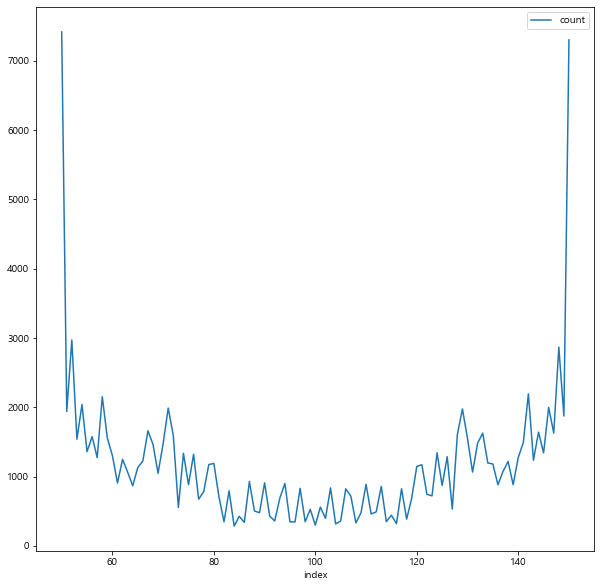

In [1070]:
df_plot.plot()

In [1071]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_test_pred2 = model2(X_test2)
        X_test_pred2 = X_test_pred2.numpy()
    df_test2 = pd.DataFrame(X_test_pred2).reset_index(drop=True)

In [1072]:
if XGB_bool:
    df_test2 = pd.DataFrame(model2.predict(X_test2)).reset_index(drop=True)

In [1073]:
df_test2.round(0).value_counts()

50.0     7417
150.0    7302
52.0     2971
148.0    2868
142.0    2197
58.0     2153
54.0     2040
146.0    2001
71.0     1990
129.0    1978
51.0     1939
149.0    1874
67.0     1659
144.0    1640
133.0    1629
147.0    1628
128.0    1606
72.0     1595
56.0     1577
59.0     1555
130.0    1546
53.0     1540
141.0    1493
132.0    1482
70.0     1476
68.0     1467
55.0     1361
124.0    1342
145.0    1342
74.0     1336
76.0     1322
60.0     1303
126.0    1286
57.0     1275
140.0    1272
62.0     1249
143.0    1237
66.0     1227
138.0    1221
134.0    1193
80.0     1190
135.0    1182
79.0     1174
121.0    1172
120.0    1148
65.0     1130
137.0    1075
131.0    1068
63.0     1065
69.0     1047
87.0      927
90.0      909
61.0      907
94.0      901
110.0     889
136.0     884
75.0      884
139.0     881
125.0     873
64.0      868
113.0     856
103.0     839
97.0      833
117.0     828
106.0     823
83.0      793
78.0      785
122.0     744
123.0     721
107.0     719
81.0      709
93.0  

In [1074]:
df_plot2 = pd.DataFrame(df_test2.round(0).value_counts())

In [1075]:
df_plot2.columns = ['count']

In [1076]:
df_plot2.reset_index(inplace=True)

In [1077]:
df_plot2

,0,count
0,50.0,7417
1,150.0,7302
2,52.0,2971
3,148.0,2868
4,142.0,2197
5,58.0,2153
6,54.0,2040
7,146.0,2001
8,71.0,1990
9,129.0,1978


In [1078]:
df_plot2 = df_plot2.sort_values(0, ascending=True)

In [1079]:
df_plot2.set_index(0, inplace=True)

In [1080]:
df_plot2

,count
0,
50.0,7417
51.0,1939
52.0,2971
53.0,1540
54.0,2040
55.0,1361
56.0,1577
57.0,1275
58.0,2153


<AxesSubplot:xlabel='0'>

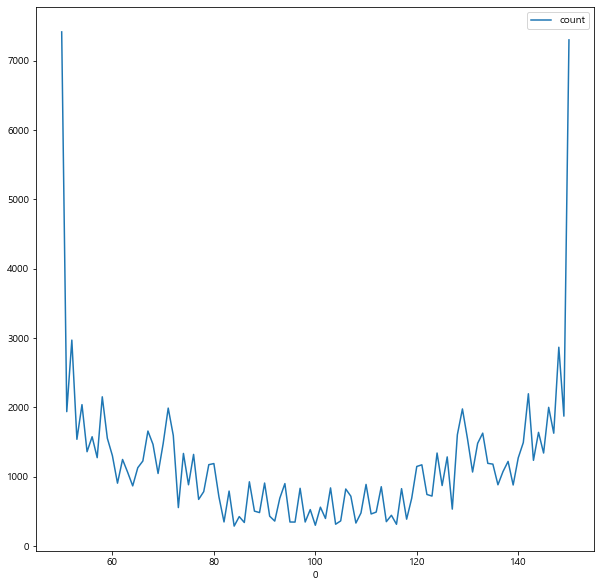

In [1081]:
df_plot2.plot()

# 시각화

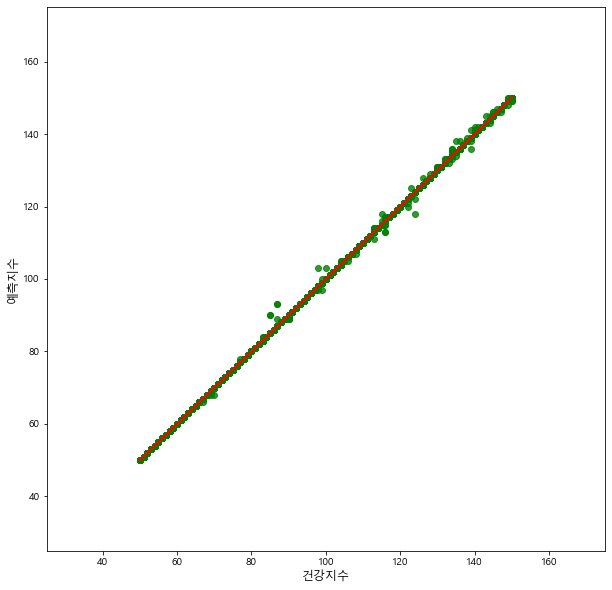

In [1082]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), df_test2.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 여성 데이터 전체 계산

In [1083]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target
0,2021,53,2632765,2,26,2.4,163.78,163.78,132.0
1,2024,53,2658222,2,29,2.6,190.43,190.43,145.0
2,2020,54,497669,2,30,2.9,137.17,137.17,119.0
3,2022,54,1319859,2,32,2.7,183.95,183.95,142.0
4,2023,54,2039511,2,33,2.3,136.14,136.14,118.0


In [1084]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298334 entries, 0 to 298333
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   검진년도       298334 non-null  int64  
 1   UID        298334 non-null  int64  
 2   CU_REC_ID  298334 non-null  int64  
 3   SEX        298334 non-null  int64  
 4   검진당시나이     298334 non-null  int64  
 5   글로블린       298334 non-null  float64
 6   글로블린_kde   298334 non-null  float64
 7   kde_mean   298334 non-null  float64
 8   target     298334 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 20.5 MB


In [1085]:
df_woman[df_woman['UID'] == 196909]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target
64494,2021,196909,2495703,2,28,3.1,89.35,89.35,95.0
64495,2022,196909,2495702,2,29,3.5,21.66,21.66,61.0
64496,2023,196909,2495700,2,30,3.1,95.56,95.56,98.0
64497,2024,196909,2495697,2,31,3.1,88.95,88.95,94.0


In [1086]:
if scaling_bool:
    df_pred2 = df_woman_scaled.copy()
else:
    df_pred2 = df_woman.copy()

In [1087]:
len(df_pred2)

298334

In [1088]:
df_pred2.reset_index(drop=True, inplace=True)

In [1089]:
X_test2

,검진당시나이,글로블린
6781,26,2.5
66677,33,3.0
193692,36,2.5
40956,38,3.4
89777,43,3.1
...,...,...
165081,48,1.8
182647,37,3.3
63016,43,2.4
95640,33,1.9


In [1090]:
df_pred2.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '글로블린', '글로블린_kde',
       'kde_mean', 'target'],
      dtype='object')

In [1091]:
df_pred2[train_columns]

,검진당시나이,글로블린
0,26,2.4
1,29,2.6
2,30,2.9
3,32,2.7
4,33,2.3
...,...,...
298329,47,2.7
298330,50,2.8
298331,57,3.2
298332,35,2.7


In [1092]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        pred_data2 = model2(torch.Tensor(df_pred2[train_columns].to_numpy()))
        pred_data2 = pred_data2.numpy()

In [1093]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_pred2[train_columns])

In [1094]:
pred_data2

array([132.00085 , 144.99902 , 119.002075, ...,  83.00289 , 146.99811 ,
       137.99535 ], dtype=float32)

In [1095]:
df_output2 = pd.concat([df_pred2, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [1096]:
if scaling_bool:
    df_output2 = pd.concat([df_woman[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output2], axis=1)

In [1097]:
df_output2.head(10)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target,예측지수
0,2021,53,2632765,2,26,2.4,163.78,163.78,132.0,132.000854
1,2024,53,2658222,2,29,2.6,190.43,190.43,145.0,144.999023
2,2020,54,497669,2,30,2.9,137.17,137.17,119.0,119.002075
3,2022,54,1319859,2,32,2.7,183.95,183.95,142.0,142.001556
4,2023,54,2039511,2,33,2.3,136.14,136.14,118.0,117.998222
5,2024,54,2750990,2,34,2.6,200.00,200.00,150.0,150.001648
6,2022,56,1351361,2,33,2.4,160.32,160.32,130.0,129.997971
7,2023,56,2032999,2,34,2.6,200.00,200.00,150.0,150.001648
8,2021,59,701026,2,29,2.8,154.68,154.68,127.0,127.002899
9,2022,59,1376992,2,30,2.6,200.00,200.00,150.0,150.001801


## 예측지수 성능평가

In [1098]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['target'], df_output2['예측지수'])

0.003959402304421897

# target으로 나이 계산

In [1099]:
df_output2['예측나이'] = ((100 - df_output2['예측지수']) / 5) + df_output2['검진당시나이']
df_output2['예측나이'] = df_output2['예측나이'].round(2)

In [1100]:
df_output2.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target,예측지수,예측나이
0,2021,53,2632765,2,26,2.4,163.78,163.78,132.0,132.000854,19.6
1,2024,53,2658222,2,29,2.6,190.43,190.43,145.0,144.999023,20.0
2,2020,54,497669,2,30,2.9,137.17,137.17,119.0,119.002075,26.2
3,2022,54,1319859,2,32,2.7,183.95,183.95,142.0,142.001556,23.6
4,2023,54,2039511,2,33,2.3,136.14,136.14,118.0,117.998222,29.4
5,2024,54,2750990,2,34,2.6,200.00,200.00,150.0,150.001648,24.0
6,2022,56,1351361,2,33,2.4,160.32,160.32,130.0,129.997971,27.0
7,2023,56,2032999,2,34,2.6,200.00,200.00,150.0,150.001648,24.0
8,2021,59,701026,2,29,2.8,154.68,154.68,127.0,127.002899,23.6
9,2022,59,1376992,2,30,2.6,200.00,200.00,150.0,150.001801,20.0


## 예측나이 성능평가

In [1101]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['검진당시나이'], df_output2['예측나이'])

6.198284942380018

# 최종 산출

In [1102]:
df_output2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,글로블린_kde,kde_mean,target,예측지수,예측나이
0,2021,53,2632765,2,26,2.4,163.78,163.78,132.0,132.000854,19.6
1,2024,53,2658222,2,29,2.6,190.43,190.43,145.0,144.999023,20.0
2,2020,54,497669,2,30,2.9,137.17,137.17,119.0,119.002075,26.2
3,2022,54,1319859,2,32,2.7,183.95,183.95,142.0,142.001556,23.6
4,2023,54,2039511,2,33,2.3,136.14,136.14,118.0,117.998222,29.4


# DataMart csv

In [1103]:
df_copy = df.copy()

In [1104]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린
0,2010,7282,2520,1,42,NaN
1,2010,7490,3638,1,39,2.4
2,2010,7915,3997,1,36,3.0
3,2010,8056,4745,1,42,2.5
4,2010,8457,3929,1,38,3.1


In [1105]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1213899 non-null  int64  
 1   UID        1213899 non-null  int64  
 2   CU_REC_ID  1213899 non-null  int64  
 3   SEX        1213899 non-null  int64  
 4   검진당시나이     1213899 non-null  int64  
 5   글로블린       962998 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 55.6 MB


In [1106]:
minimums

[1.15]

In [1107]:
maximums

[4.15]

In [1108]:
train_columns

['검진당시나이', '글로블린']

In [1109]:
target_cols

['글로블린']

In [1110]:
for idx, col in enumerate(target_cols):
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [1111]:
df_woman_csv = df_copy[df_copy['SEX'] == 2]
len(df_woman_csv)

448440

In [1112]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린
10,2010,15894,2533,2,29,2.5
22,2010,42223,1364,2,24,3.0
37,2011,364096,6645,2,32,NaN
45,2010,120518,3595,2,30,2.8
63,2011,698706,6600,2,36,NaN


## 검진 항목 all 결측치 지우기

In [1113]:
target_cols

['글로블린']

In [1114]:
df_woman_csv.dropna(subset=target_cols, how='all', inplace=True)

In [1115]:
df_woman_csv.reset_index(drop=True, inplace=True)

In [1116]:
len(df_woman_csv)

355663

## fillna

In [1117]:
df_woman.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '글로블린', '글로블린_kde',
       'kde_mean', 'target'],
      dtype='object')

In [1118]:
df_woman_csv.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '글로블린'], dtype='object')

In [1119]:
df_woman_csv.fillna(df_woman.mean().round(2), inplace=True)

## 글로블린 스크리닝

In [1120]:
screening = 3.5

In [1121]:
scr_col = '글로블린'

In [1122]:
df_woman_csv[df_woman_csv[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린
55,2011,200369,10857,2,23,3.90
92,2011,704902,5533,2,32,4.15
174,2018,201435,262218,2,44,4.00
295,2019,7855,413573,2,47,3.60
516,2019,9942,414950,2,26,3.60


In [1123]:
len(df_woman_csv[df_woman_csv[scr_col] > screening])

6110

In [1124]:
df_woman_csv.loc[df_woman_csv[scr_col] > screening, scr_col] = screening

In [1125]:
df_woman_csv[df_woman_csv[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린


In [1126]:
len(df_woman_csv[df_woman_csv[scr_col] > screening])

0

In [1127]:
len(df_woman_csv)

355663

## 모델 예측

In [1128]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_woman_csv[train_columns])

In [1129]:
pred_data2 = pred_data2.round(0)

In [1130]:
df_woman_csv = pd.concat([df_woman_csv, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [1131]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,예측지수
0,2010,15894,2533,2,29,2.5,150.0
1,2010,42223,1364,2,24,3.0,110.0
2,2010,120518,3595,2,30,2.8,129.0
3,2010,167053,3087,2,26,2.4,132.0
4,2019,7687,1867229,2,42,2.6,148.0


### 성능 평가

In [1132]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_woman_csv['target'], df_woman_csv['예측지수']))

In [1133]:
# r2_score(df_woman_csv['target'], df_woman_csv['예측지수'])

## 예측나이 계산

In [1134]:
df_woman_csv['예측나이'] = ((100 - df_woman_csv['예측지수']) / 5) + df_woman_csv['검진당시나이']
df_woman_csv['예측나이'] = df_woman_csv['예측나이'].round(2)

### 성능 평가

In [1135]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_woman_csv['검진당시나이'], df_woman_csv['예측나이']))

MAE : 6.203522997894073


In [1136]:
r2_score(df_woman_csv['검진당시나이'], df_woman_csv['예측나이'])

0.3521124203001036

In [1137]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,예측지수,예측나이
0,2010,15894,2533,2,29,2.5,150.0,19.0
1,2010,42223,1364,2,24,3.0,110.0,22.0
2,2010,120518,3595,2,30,2.8,129.0,24.2
3,2010,167053,3087,2,26,2.4,132.0,19.6
4,2019,7687,1867229,2,42,2.6,148.0,32.4


In [1138]:
df_woman_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355663 entries, 0 to 355662
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   검진년도       355663 non-null  int64  
 1   UID        355663 non-null  int64  
 2   CU_REC_ID  355663 non-null  int64  
 3   SEX        355663 non-null  int64  
 4   검진당시나이     355663 non-null  int64  
 5   글로블린       355663 non-null  float64
 6   예측지수       355663 non-null  float32
 7   예측나이       355663 non-null  float64
dtypes: float32(1), float64(2), int64(5)
memory usage: 20.4 MB


# 최종 UID별 확인

In [1139]:
# 성윤..
df_woman_csv[df_woman_csv['UID'] == 261581].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,예측지수,예측나이
90970,2021,261581,806568,2,50,3.1,118.0,46.4
90976,2021,261581,2243879,2,50,3.1,118.0,46.4
90977,2021,261581,2418909,2,50,3.1,118.0,46.4
90978,2021,261581,2418910,2,50,3.1,118.0,46.4
143489,2022,261581,751339,2,51,2.6,149.0,41.2
143492,2022,261581,2243878,2,51,2.6,149.0,41.2
222356,2023,261581,1519764,2,52,3.0,125.0,47.0
222357,2023,261581,2243877,2,52,3.0,125.0,47.0
326158,2024,261581,2418911,2,53,2.4,121.0,48.8


In [1140]:
# 차종..
df_woman_csv[df_woman_csv['UID'] == 477944].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,예측지수,예측나이
44998,2022,477944,956268,2,31,2.0,73.0,36.4
170769,2022,477944,2212776,2,31,2.0,73.0,36.4
260906,2023,477944,1454346,2,32,2.5,149.0,22.2
260907,2023,477944,2212775,2,32,2.5,149.0,22.2
336810,2024,477944,2362855,2,33,3.0,131.0,26.8


In [1141]:
# 성혜빈
df_woman_csv[df_woman_csv['UID'] == 896916].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,예측지수,예측나이
282950,2023,896916,1459636,2,28,2.3,126.0,22.8
282940,2023,896916,1842092,2,28,2.3,126.0,22.8
282951,2023,896916,2031853,2,28,2.3,126.0,22.8
282952,2023,896916,2253054,2,28,2.3,126.0,22.8
277822,2023,896916,2257188,2,28,2.3,126.0,22.8
346085,2024,896916,2253058,2,29,2.4,148.0,19.4


# 최종 CSV 병합 Extract

In [1142]:
len(df_man_csv)

607335

In [1143]:
len(df_woman_csv)

355663

In [1144]:
df_csv = pd.concat([df_man_csv, df_woman_csv])

In [1145]:
df_csv.to_csv(csv_path)